In [54]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null| Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [3]:
simplest_grammar = """
number = number number | single_number
single_number = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
"""

In [38]:
import random

In [91]:
def adj():
    return random.choice("蓝色的 | 好看的 | 小小的".split("|"))

In [6]:
adj()

' 好看的 '

In [7]:
def adj():
    return random.choice("蓝色的 | 好看的 | 小小的".split("|")).split()[0]

In [8]:
adj()

'蓝色的'

In [9]:
def  adj_star():
    return random.choice([None, adj() + adj()])

In [10]:
adj_star()

'好看的蓝色的'

In [13]:
adj_star()

'蓝色的好看的'

In [12]:
adj_star()

In [40]:
adj_grammar = """
Adj* => null| Adj Adj*
Adj => 蓝色的 | 好看的 | 小小的
"""

In [42]:
grammar = {}

In [89]:
simple_grammar

'\nsentence => noun_phrase verb_phrase\nnoun_phrase => Article Adj* noun\nAdj* => null| Adj Adj*\nverb_phrase => verb noun_phrase\nArticle => 一个 | 这个\nnoun => 女人 | 篮球 | 桌子 | 小猫\nverb => 看着 | 坐在 | 听着 | 看见\nAdj => 蓝色的 | 好看的 | 小小的\n'

In [43]:
for line in adj_grammar.split("\n"):
    if not line.strip():
        continue
    exp, stmt = line.split("=>")
    grammar[exp.strip()] = stmt.split("|")

In [60]:
grammar

{'Adj': [' 蓝色的 ', ' 好看的 ', ' 小小的'], 'Adj*': [' null', ' Adj Adj*']}

In [44]:
def generate(gram, target):
    if target in gram: #target could be expanded
        new_expanded = random.choice(gram[target])
        return "".join(generate(gram, t) for t in new_expanded)
    else:
        return target

In [45]:
generate(gram=grammar, target="Adj*")

' null'

In [45]:
for line in adj_grammar.split("\n"):
    if not line.strip():
        continue
    exp, stmt = line.split("=>")
    grammar[exp.strip()] = [s.split() for s in stmt.split("|")]

In [67]:
grammar

{'Adj': [['蓝色的'], ['好看的'], ['小小的']], 'Adj*': [['null'], ['Adj', 'Adj*']]}

In [46]:
def generate(gram, target):
    if target in gram: #target could be expanded
        new_expanded = random.choice(gram[target])
        return "".join(generate(gram, t) for t in new_expanded)
    else:
        return target

In [71]:
generate(gram=grammar, target="Adj*")

'小小的好看的null'

In [47]:
choice = random.choice

def generate(gram, target):
    if target not in gram: #means target is a terminal express
        return target
    return " ".join(generate(gram, t) for t in choice(gram[target]))

In [80]:
generate(gram=grammar, target="Adj*")

'好看的 好看的 蓝色的 小小的 小小的 好看的 小小的 蓝色的 null'

In [52]:
def create_grammar(grammar_str):
    grammar  = {}
    for line in grammar_str.split("\n"):
        if not line.strip():
            continue
        exp, stmt = line.split("=>")
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar

In [55]:
example_grammar = create_grammar(simple_grammar)

In [96]:
example_grammar

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [99]:
generate(gram = example_grammar, target = "sentence")

'这个小小的蓝色的null女人坐在这个小小的null小猫'

In [120]:
choice = random.choice

def generate(gram, target):
    if target not in gram: #means target is a terminal express
        return target
    
    expand = [generate(gram, t) for t in choice(gram[target])]
    return "".join(e for e in expand if e != "null")

In [92]:
generate(gram = example_grammar, target = "sentence")

'这个篮球看着这个小猫'

In [94]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [97]:
def create_grammar(grammar_str, split="=>"):
    grammar  = {}
    for line in grammar_str.split("\n"):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar

In [101]:
generate(gram=create_grammar(host, split="="), target="host")

'您好我是1599号,您需要赌博吗？'

In [102]:
generate(gram=create_grammar(human, split="="), target="human")

'俺想找点乐子'

In [107]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n  ... stmt }
while_exp=> while ( var ) { /n ... stmt }
var => chars number
chars => char | char char
char => a | b | c  | d | e
number => 1 | 2 | 3
"""

In [110]:
generate(gram=create_grammar(programming, split="=>"), target="stmt")

'if(ac2)/n{while(ab2)/n{if(c2)/n{while(b1)/n{cb3=ea3}}}}'

In [122]:
def create_grammar(grammar_str, split="=>", line_split="\n"):
    grammar  = {}
    for line in grammar_str.split(line_split):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar

In [123]:
generate(gram=create_grammar(programming, split="=>"), target="stmt")

'while(ba3)/n{if(cb2)/n{if(eb2)/n{bd2=b3}}}'

In [124]:
choice = random.choice

def generate(gram, target):
    if target not in gram: #means target is a terminal express
        return target
    
    expand = [generate(gram, t) for t in choice(gram[target])]
    return "".join([e if e != "/n" else "\n" for e in expand if e != "null"])

In [125]:
generate(gram=create_grammar(programming, split="=>"), target="stmt")

'c1=d2'

In [136]:
print(generate(gram=create_grammar(programming, split="=>"), target="stmt"))

if(eb1)
{while(d1)
{while(d1)
{bd2=cc3}}}


In [137]:
for i in range(20):
    print(generate(gram=create_grammar(host, split="="), target = "host"))

你好我是4号,请问你要赌博吗？
你好我是9号,您需要打牌吗？
小朋友,您好我是2833号,请问你要赌博吗？
女士,您好我是9号,请问你要赌博吗？
先生,您好我是2号,您需要喝酒吗？
你好我是529号,请问你要打牌吗？
您好我是3号,请问你要喝酒吗？
你好我是283号,请问你要打猎吗？
女士,你好我是8号,请问你要喝酒吗？
您好我是7454号,请问你要打牌吗？
您好我是8号,请问你要打猎吗？
您好我是2号,请问你要打牌吗？
您好我是1号,您需要赌博吗？
您好我是9号,请问你要喝酒吗？
您好我是455号,您需要喝酒吗？
小朋友,你好我是89号,您需要打猎吗？
先生,您好我是274号,请问你要赌博吗？
小朋友,您好我是15号,您需要赌博吗？
你好我是7号,您需要打牌吗？
你好我是61号,您需要打猎吗？


In [12]:
filename = "E:/人工智能培训课程/人工智能与自然语言处理/lesson1/数据集/sqlResult_1558435.csv"

In [13]:
import pandas as pd

In [14]:
content = pd.read_csv(filename, engine="python")

In [15]:
filename = "E:/人工智能培训课程/人工智能与自然语言处理/lesson1/数据集/sqlResult_1558435.csv"

In [156]:
import pandas as pd

In [16]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [17]:
articles = content["content"].tolist()

In [161]:
articles

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\n那么事发时\n到底都发生了些什么呢？\n南都记者带您一起还原现场\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\n刘青介绍，6月16日早上7时36分，他正在

In [15]:
len(articles)

89611

In [163]:
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\n三夏时节不等人\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\n麦收时节 我们在一起\n6月中旬的和田墨玉，麦田金黄，静待收割。\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\n细看稻菽千重浪\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无声的竞赛。\n骄阳似火，汗如雨下，但这都挡不住大家的

In [18]:
import re

In [19]:
def token(string):
    return re.findall('\w+', string)

In [18]:
token(articles[110])

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [20]:
"".join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [21]:
article_clean = ["".join(token(str(a))) for a in articles]

In [20]:
article_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [22]:
import jieba

In [175]:
!pip install jieba

Looking in indexes: http://pypi.douban.com/simple
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\f9\f6\9d\02ac6ba74c56da67e49dfe05166b4bc88f3d8f938d772d9dd0
Successfully built jieba


In [22]:
import jieba

In [23]:
def cut(string):
    return list(jieba.cut(string))

In [24]:
TOKEN = []

In [25]:
with open('article_9k.txt', 'w') as f:
    for a in article_clean:
        f.write(a + "\n")

In [61]:
for i, line in enumerate((open("article_9k.txt"))):
    if i % 100 == 0:
        print(i)
        print(line)
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Admin\AppData\Local\Temp\jieba.cache


0
此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息



Loading model cost 0.912 seconds.
Prefix dict has been built succesfully.


100
nan

200
阿森纳和桑切斯续约的问题已经拖了一个赛季了至今依然没有解决考虑到智利人的合同只剩下最后一年了如果无法续约阿森纳最好的方式今夏将他卖掉套现如今桑切斯热门的下家只剩拜仁和曼城了来自每日镜报的消息称拜仁认为桑切斯可能已经做好决定他贴心要去曼城了早前英国媒体就曾经报道过曼城愿意支付5000万镑的转会费收购桑切斯考虑到他的合同只剩一年这个价格已经非常良心了但是阿森纳不愿意将桑切斯卖给自己同联赛的竞争对手他们更希望将桑切斯卖给拜仁即便拜仁在能提供的转会费上并不如曼城那么可观不过拜仁如今也面临着难题即便和阿森纳在桑切斯的转会费问题上达成一致拜仁也无法满足桑切斯的工资要求每日镜报称桑切斯告知拜仁如果加盟拜仁他要求得到一份年薪2185万镑的合同这意味着他的周薪会达到42万镑这将彻底打破拜仁现行的工资结构这是拜仁无法接受的工资谈不妥交易就无法完成每日镜报称拜仁担忧桑切斯坚持要巨额合同的原因是他根本不想来拜仁只是想用高薪做手段逼迫拜仁放弃求购这样阿森纳就只能和曼城做交易了马尔科

300
原标题小伙想变女人在家挥刀自宫遇到过因为运动导致睾丸扭转坏死的因为车祸等意外导致睾丸破裂的也遇到过网上买了器具自己在家割包皮的但像他这样自己在家割睾丸的还是第一次遇到杭州市一家医院的医生感叹道看视频自学小伙儿在家挥刀自宫这位自己割蛋蛋的壮士究竟是什么情况事情还得从10多天前说起10多天前的一个中午一名着装正常的男子被送到了医院的急诊室只见他的裤裆满是鲜血下身还不断有血液涌出起初医护人员以为这名长得还挺好看的患者是出了什么意外事故才导致下体出血但不久便发现事情并不简单治疗中发现患者的两侧睾丸已经不翼而飞了而流血不止的恰是左侧睾丸询问过患者情况令黄亚胜惊讶的是这个小伙子竟然通过睾丸切除视频自学然后在网上买了止血钳麻药等器具和药物最后在家中独自做了睾丸切除手术切除还算顺利右侧经过止血钳也止住了血但左侧不知道出了什么情况血流不止最后吓得患者只得打了120睾丸中存在动脉如果没有及时止住血可能会有生命危险和睾丸扭转等情况一样如果能在6小时内接上睾丸其复活率还是不错的黄亚胜说但患者的回答再次令黄亚胜讶异患者竟然和我说他切下睾丸后就扔进抽水马桶冲掉了无奈之下黄亚胜只得给他做了止血清创缝合等处理他强调像这种睾丸切除手术由于专业性强存在一定的风险务必要寻求专业机构和医生的帮助10岁前被父母当女孩养

800
汪东城台湾媒体6月19日报道艺人汪东城是前偶像团体飞轮海成员当时男团爆红全亚洲还连续3年代言台湾观光随着各团员退团单飞要见到4人合体比登天还难而他近日受访被问起何时再合体响应除非是痒了不是有句话吗七年之痒我掐指一算应该再过几年就会合了飞轮海自2005年出道4成员代表春夏秋冬象征温暖炎热凉爽酷冷等不同温度的偶像众成员因演出偶像剧爆红吴尊2011年因无心歌唱退团汪东城2013年自组经纪公司退团炎亚纶2014年直言不是朋友证实团体不合传言4人至今仍各自活跃在娱乐圈只是公开或私下要相聚永远少一咖据报道汪东城和吴尊辰亦儒合伙投资发廊又和辰亦儒开面包店受访时随兴就画起Q版吴尊还揭露辰亦儒爱脱癖连不需要脱的场合也要脱谈起4人合体笑说要等七年之痒听到有人提醒七年之痒形容分手笑回可以说分为什么不能说合分分合合不就是这样吗35岁的汪东城至今单身表演重心转战大陆娱乐圈也没有传过绯闻相较于同团吴尊已经是2个孩子的爸爸再加上一样单身的表弟其实有了交往10几年的女友他自嘲压力变大拍戏半夜也没人来敲房门我也在等人敲但就是没有

900
央广网石家庄6月23日消息记者王冠文自6月21日起河北省迎来了一轮强降雨天气为降低强降雨对道路通行安全的影响确保强降雨期间全省道路安全畅通全省各级交管部门制定完善了应急管理措施强化职责落实启动应急预案警力投放路面一线疏导车辆救助受困群众为做到闻警而动掌握先机河北省各级交管部门加强并保持与气象防汛等部门的实时信息沟通及时了解暴雨雷暴冰雹等恶劣天气预报信息做好恶劣天气交通影响分析评估研判对重点地区重点道路及早进行应急预警通过巡逻管控视频监控专人盯守等方式加强暴雨冰雹恶劣天气辖区路段的实时监控做到局部恶劣天气早发现早预警早处置确保人员车辆的交通安全同时交管部门加强了与消防卫生交通运输部门和公路经营养护单位的联动联勤在重点路段备好应急救援清障施救车辆设备和装备遇有故障车辆和交通事故时快速出警快速处置严防二次事故同时协调安监交通运输等部门在辖区易漫水路桥易积水和易发生塌方泥石流路段设置警示提示标志储备应急设备遇有水毁泥石流塌方等情况时迅速处置尽早恢复道路通行

1000
在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷

2000
期货市场监管案例四近日大商所相关部门向记者披露了3起在不活跃合约通过对敲手段转移资金的案例尽管这3起案例涉案金额相对较小没有构成犯罪但对敲转移资金行为扰乱了期货市场正常交易秩序是交易所严厉打击查处的违规行为大商所相关负责人表示采取对敲交易转移资金的违规行为基于其主体身份不同动机和目的不同所造成的法律后果也是各不相同不论在哪种情况下以何种主体身份实施的对敲交易都是期货交易所业务规则严格禁止的均会受到相应的处罚轻者给予警告强行平仓暂停开仓交易1至6个月的处罚重者给予宣布为市场禁止进入者罚款没收违规所得的处罚构成犯罪的依法追究刑事责任侯某陈某对敲转移资金案日前大商所在日常监控中发现客户侯某陈某在不活跃合约上对敲成交1笔成交量40手占比当日总成交量的100涉及成交金额163万元累计转移资金15万元造成合约最大波动为72违规交易发生后交易所及时通知期货公司限制盈利方侯某账户出金同时要求客户提供情况说明据侯某和陈某供述该事件是由于两人在夜盘进行程序测试程序错误导致本次对敲发生盈利方侯某通过银行转账把对敲的不当得利15万元归还给陈某客户侯某陈某利用不活跃合约进行账户之间资金转移金额较大且二人对此笔对敲转移资金均知情违反了大连商品交易所违规处理办法第二十九条第三款利用对敲自成交等手段影响市场价格转移资金或者牟取不当利益的规定交易所对侯某和陈某给予暂停开仓1个月并处警告的处分

2100
该委员会提出的修正案方案跟保护欧盟国家每位民众的基本权利使其享有对其私人与家庭生活家庭以及通信获得尊重的欧盟基本权利宪章第7条内容相关委员会认为这种保密原则应当适用于当下以及未来所有的通讯方式修正案提案指出加密逆向工程或监控通讯的这些行为都应当禁止通信服务运营商不应被要求提供后门另外提案还称政府不仅要保护现使用的通讯内容而且还要保护诸如拨通的电话号码访问的网站地址地址位置时间日前通话时间等元数据因为它们也会揭露跟用户私人生活相关的信息目前这项修正案需要先在议会获得批准才能进入欧盟理事会进行下一步的动作

2200
中国证券报记者日前从郑州商品交易所获悉为改善商品期货活跃合约集中在159月现象进一步发挥期货市场功能郑商所将以PTA和动力煤期货为试点通过降低持仓及交割成本引入做市商交易机制等方式进行重点引导促进商品期货品种合约连续活跃服务产业链企业更好利用期货工具当前我国商品期货市场多数品种交

3100
参考消息网6月16日报道日媒称台湾鸿海会长郭台铭表示日本经济产业省在东芝公司出售半导体存储器项目上进行干预日本担心技术外流到中国郭台铭对经济产业省的干预予以抨击尖端技术研发将继续在日本进行根本不会外流据日本每日新闻6月15日报道申请收购东芝半导体存储器业务的台湾鸿海精密工业公司董事长郭台铭6月14日在台北市内接受每日新闻记者采访郭台铭称收购方的选定实际上是由日本经济产业省主导的这不公平他强烈批评经济产业省干预选定环节针对有人担心技术流向中国郭台铭反驳说尖端技术将继续在日本开发不会外泄问有人担心鸿海的收购会导致技术流向中国答鸿海在中国有很多工厂关系深厚所以经济产业省的部分官员有这个担心但是我单纯是因为中国的市场大才到中国开展业务没有从中国政府那里收过一分钱向竞争对手泄露技术没有任何好处我绝对不会这么做即使收购东芝的半导体存储器最尖端的研发还会继续留在日本问如何看待争夺战的现状答实际上这是由经济产业省主导的很不公平经济产业省管理的半官方基金产业革新机构没有参与东芝实施的2次招标是在看了我们的提案内容后才参与谈判的这种违反规则的事情在国际招投标中是不可能有的事情不仅如此经济产业省还告诉商讨与我们共同出资的美国苹果等公司鸿海没有机会最好不要与其联手从中作梗这种事情前所未闻我们不排除会诉诸法庭解决问鸿海收购方案有什么优势答我们可以实现稳定的经营我们在与个人电脑巨头戴尔金士顿科技苹果亚马逊等美国企业讨论出资的事情是因为它们的产品在使用东芝的半导体可以支撑起经营我们希望鸿海与夏普的出资比率控制在40以下东芝的出资比率至少维持在15为了追赶全球排名第一的韩国三星电子我们将大力进行研发投资编译张诚资料图片郭台铭新华社记者欧东衢摄点击图片进入下一页

3200
朱丹晒周一围近照6月18日知名主播朱丹在微博晒出一组周一围的照片并发文迷自拍day9之他也帅在我的镜头里早安今天我该启程啦朱丹资料图网友纷纷留言情人节秀恩爱正常父亲节秀恩爱是不是有深意据悉此前有媒体曝光过朱丹疑似怀孕的消息不知道这次在父亲节秀恩爱的朱丹是否真有深意早前报道主持人朱丹疑似隐婚怀孕玩偶遮肚行动迟缓图时间2017年06月01日092504来源名侦探赵五儿美女主持人朱丹同学的人生很可能已经翻开新篇章了前段时间在上海跟随朱丹工作意外发现原本盘靓条顺的大妹子这腿也粗了脸也肿了关键是肚子还挺老高难不成是有喜了不由得翻

4100
梁涛副主席在中国再保险巨灾研究中心揭幕暨首届巨灾风险与保险高峰论坛的致辞2017年6月22日大家下午好今天非常高兴参加中国再保险巨灾研究中心揭幕暨首届巨灾风险与保险高峰论坛中国再保险巨灾研究中心的成立和高峰论坛的召开为保险行业与政府科研领域的互动搭建了一个很好的学术交流平台也为进一步推动巨灾保险发展提供了良好的机会我对中再集团巨灾研究中心成立及本次论坛顺利召开表示热烈祝贺众所周知我国是世界上自然灾害最严重的国家之一长期以来党和政府在灾害应对及管理方面投入大量人力物力财力也承担了巨大压力保险作为市场经济风险管理的基本手段通过市场机制引导商业保险公司积极参与巨灾风险管理能够丰富我国灾害损失补偿渠道健全灾害救助体系提高巨灾保障水平增强风险管理能力平滑灾害引起的政府财政波动是政府运用现代金融手段降低灾害损失影响的有效途径目前建立巨灾保险制度已上升为国家意志十八届三中全会明确提出完善保险经济补偿机制建立巨灾保险制度中共中央国务院关于推进防灾减灾救灾体制机制改革的意见提出加快巨灾保险制度建设逐步形成财政支持下的多层次巨灾风险分散机制根据建立巨灾保险制度的总体部署保监会会同相关部门积极推进相关工作研究制定地震巨灾保险条例为地震巨灾保险提供法律保障开展课题研究提出巨灾保险制度总体思路和框架体系并结合我国国情和现实需要选择保障不足关注度高的地震保险为突破口先行建立地震巨灾保险制度2016年5月12日保监会财政部联合印发建立城乡居民住宅地震巨灾保险制度实施方案为地震巨灾保险奠定政策基础2016年12月26日地震巨灾保险运营平台上线实现住宅地震共同体业务的出单业务财务清算功能2017年5月财政部印发城乡居民住宅地震巨灾保险专项准备金管理办法规范相关专项准备金计提使用等环节自2016年7月1日地震保险产品正式全面销售以来承保标的1980万个保费收入50309万元保险金额18875亿元同时各地在巨灾保险方面的先行先试在保民生保稳定方面发挥了积极作用政府掌舵市场和社会组织划桨的运作模式已经初见成效虽然巨灾保险工作已经迈出实质性步伐取得阶段性进展但是我国巨灾保险制度推进确实存在很多现实困难灾害种类多分布地域广建立巨灾保险制度涉及部门多利益主体广群众通过保险分散风险的意识不够依赖政府心理较重等因此巨灾保险制度建设是一项系统工程中再集团作为我国境内唯一的再保险集团公司以深耕国内市场做优做深

5200
点击图片进入下一页中国网财经6月23日讯今日新三板做市指数开盘后持续震荡下行截至午间收盘新三板做市指数报105797点跌196点跌幅018成交9294万元早盘共有372家做市公司发生交易成交金额107亿元涨跌幅方面滴滴集运涨400领涨做市个股精为天六合伟业瑞立达等涨幅居前中筑天佑疆能股份环宇建工等跌幅居前其中今日滴滴集运精为天协议转做市另外共有277家协议公司发生交易成交金额450亿元涨跌幅方面国傲科技德信德胜等9股涨10000领涨协议个股普康迪一森园林宏祥新材等8只股跌50跌幅居前创新层方面万杰智能涨100领涨创新层个股基诺股份泰恩康等涨幅居前一森园林中源股份九天云竹等跌幅居前板块方面卸装搬运和运输代理业其他服务业等板块涨幅居前文教工美体育和娱乐用品制造业纺织服装服饰业废弃资源综合利用业等跌幅居前

5300
参考消息网6月21日报道美国国家利益双月刊网站6月19日报道称韩国有一种防御朝鲜日渐增多的弹道导弹的新武器系统韩国版导弹防御系统KAMD的组成部分之一中程地空导弹MSAM又称铁鹰2在近期的评价测试中这一碰撞摧毁式导弹拦截系统击落了所有5枚模拟弹道导弹韩国18日宣布已准备大规模生产这种导弹这种能消灭125英里1英里约合16公里高度以下目标的新系统将与美国爱国者3型导弹系统一起提供低空防御美国的萨德系统是唯一能够提供高空防御的系统韩国军方还在研制一种能够消灭高度在25英里至40英里之间的导弹的远程防空导弹系统据称作为对朝鲜快速研制新导弹的回应韩国军方已将完成这一导弹防御系统的目标日期提前朝鲜今年试验了10多枚导弹包括新型短程中程和中远程弹道导弹以及海岸防御巡航导弹和防空导弹韩国国防部长说朝鲜导弹项目的进展速度远远快于当初预期人们对朝鲜可能很快就将试验洲际弹道导弹深感担忧朝鲜炮兵部队大规模集结也令韩国忧心忡忡韩国4月宣布研制一种能发现朝鲜大炮的新雷达系统这种雷达能发现40英里外的大炮点击图片进入下一页资料图韩国研发的铁鹰II防空系统

5400
参考消息网6月23日报道6月上旬周边国家军情热点频现美议员访问越南登上家族舰俄北方舰队陆军比海军强越军国产无人机获重大突破等等下面就让我们来回顾分析一下6月上旬邻邦的重要军事动态美议员访问越南登上家族舰苏曼格拉迪亚斯SumangalaDias斯里兰卡现任空军参谋长空军少将军衔苏曼格拉青年时期毕业于科伦坡纳兰达学院

6000
中新社香港6月23日电题访华润集团董事长傅育宁理想一起去追续写不朽香江传奇中新社记者陈小愿理想一起去追同舟人誓相随无畏更无惧同处海角天边携手踏平崎岖我们大家用艰辛努力写下那不朽香江名句在香港回归祖国20周年之际华润集团董事长傅育宁在香港接受中央媒体联访与记者分享了香港民众耳熟能详的歌曲狮子山下这首歌道出了香港人勤奋拼搏刻苦耐劳自强不息的狮子山精神鼓舞了一代代港人傅育宁执掌的华润集团于1938年在香港创立参与和见证了香港的建设和发展也受益于香港独特的区位优势从一家名不见经传的小商号发展为跻身世界500强的多元化控股企业近80年来该集团植根香港取得长足发展也不断用自己的行动回报香港社会从1962年开始华润五丰承担的供应港澳鲜活冷冻商品的三趟快车风雨无阻被称为香港人的菜篮子1972年香港发生油荒和粮荒华润将国产石油和大米输入香港有效解决了香港的油荒和粮荒2002年在香港经济不景气大学生就业困难之际华润推出华润带你闯内地活动招聘香港大学生之后开展华润助你上北大清华活动资助香港优秀学子赴北大清华求学深造2007年华润在香港岭南大学设立奖学金资助内地偏远地区学生为内地和香港培养更多人才华润在壮大自己基业的同时始终处处体现自己对香港的承担傅育宁说特别是香港回归祖国20年来该集团作为在港央企在做好业务工作实现国有资产保值增值的同时也肩负起应有的社会责任支持特区政府依法施政在保障香港经济繁荣促进香港社会和政治稳定方面发挥了积极作用华润的很多业务从香港起步之后在内地发扬光大如目前业务规模位居中国内地连锁超市第一位的华润万家第一间超市是1984年在香港开业的华润利用香港荟萃全球先进商业模式的优势通过学习消化吸收转化结合内地市场和客户的特点积极传承和创新多项业务不断发展壮大傅育宁说回归以来该集团先后有7家公司在香港上市目前80的资产已进入上市公司平台通过上市从资本市场累计获得1400多亿港元的资金

6100
吴文玺文人的雅雅如一朵花一钩月一缕香一捧雪在离恨天在灌愁海大雅莫若如梦炎炎夏夜里如梦却是个苦差事酷热难挨汗流如注蚊叮虫咬能睡着便是神仙六龙鹜不息三伏起炎阳寝兴烦几案俯仰倦帏床滂沱汗似铄微靡风如汤这是宫体诗鼻祖梁简文帝萧纲描摹的宫廷苦夏帏就是蚊帐帝王的蚊帐丝绸材质薄虽薄矣却不透风帏如蒸笼床如饼铛汗如滂沱风如汤沸怎一个烦字了得晚明才子金圣叹形容赤日停天亦无风亦无云前后庭赫然如洪

6500
他是67岁的老兵他是十三行传奇人物200年前清朝首富伍秉鉴的第八代后人他12年间收藏了超过5辆5吨卡车的藏品堆放在一栋30个房间的民宅中他是老兵画廊的主人一天有12个小时蜗居在几平方米的仓库办公他叫伍立桥同时也是一个人博物馆的馆长每年春节他会把最好的藏品拿出来办起免费的珍品展在芳村花地大道1号的壹号文化广场三楼一场有关十三行的展览正悄然展出一些海报占据了前往东南阁过道的墙上当年的历史在故纸堆中被重新挖掘出来过道往里是一间十三行伍氏博物馆这一切的主人正是伍立桥广州日报记者想伸手与他相握却被门口一块玻璃所阻这里老鼠特别多我用这块玻璃来挡老鼠的伍立桥略带歉意地说道伍立桥看起来身体十分健壮不像67岁的人而外面第七届春节免费看珍宝展的展览正是他一人所布伍立桥的祖上声名显赫他就是十三行传奇人物清朝世界首富伍秉鉴伍秉鉴给后代留下了不少宝贝唯一身居伍氏大宗祠旧址的伍氏后人伍立桥就深受其影响祖辈还留下了一些藏品我父亲也喜欢收藏我从小就爱收藏邮票伍立桥说据介绍伍秉鉴在晚年将部分财产转移到海外同时1835年在鳌洲正街建起了伍氏大宗祠将溪峡街的伍氏泽祖祠的财物分开安置1898年伍家将伍氏大宗祠卖给了王家却将藏品隐藏了下来伍立桥便继承了仅存的一些伍氏珍藏品我们伍氏有五宝其中两宝是祖辈留下来的分别是传承200年的紫砂壶和产于光绪十六年的百年原装普洱王伍立桥介绍说每次展出这两件宝贝都会在列读者热捧他开起免费珍宝展伍立桥出生于1950年18岁时参军成为一名运输兵上世纪90年代他开始卖机电设备2005机电设备不好卖了我还是选择了自己的爱好跑出来做收藏之后他便定在了壹号文化广场三楼一做就是12年2006年他捡漏了一件珍宝郎世宁画的古堡式座钟当时只花了800元就买下来了我在北京花了2000元鉴定出是真品说起当年的一幕伍伯仍一脸兴奋后来展出时有一位参观者发现这座钟竟是他早在1985年以1800元买回来的原来是他生意不好就把这个换了一件瓷器瓷器价格很便宜换了之后那个人以为这个钟也不贵就800元卖给我了三天之后他就后悔了2009年广州有媒体报道了这座钟的故事干脆就每年搞一次展览好了让大家都可以免费看于是2010年第一届免费珍品展开始了藏品无价每一件藏品都有故事五宝中除了上面提到的三宝另外两宝是16件千年老坑端砚石刻和去年新入手的景泰蓝船那些石刻我鉴定了三个月最终用一套房换的景泰蓝船则是去年用了近一万

7500
图文告别证明癖湖北日报讯广东梅州市梅江区外来务工就业人员子女申请入读公办学校时被要求提供有无违法犯罪记录证明从而引发警方怒怼6月20日当地教育局在新下发的积分入学方案中删除了关于提供违法犯罪记录证明的相关项目6月21日人民网子女入学凭什么要求父母出具无犯罪证明这种恶的揣测会不会给外来务工人员带来排外感简化审批大背景下为什么还有一些部门要求群众开无犯罪记录之类的奇葩证明除了改革的步子跟不上政策的步伐一个重要原因是一些机构还存在根深蒂固的证明癖一离开证明就无所适从以制度上的完善促观念上的转变还需要一个持续推进的过程文李思辉时事绘漫画王铎

7600
戴先任据人力资源和社会保障部网站消息人社部决定7月3日至8月3日在全国组织开展用人单位遵守劳动用工和社会保险法律法规情况专项检查重点检查对象是招用农民工较多的劳动密集型企业以及劳务派遣单位重点检查内容包括用人单位特别是建筑施工企业遵守按月足额支付工资规定情况用人单位遵守高温津贴规定情况等当前高温津贴发放仍然存在诸多问题比如执行难落实难多地的津贴标准多年未变等像广东从2007年开始高温津贴标准就是每人一月150元从未调整而近年来物价工资都在上涨多年未变的高温津贴就有所滞后高温津贴是岗位津贴本应该随着工资相应调整但高温津贴没有纳入工资范畴独立于工资之外而这也让高温津贴成了容易被忽略与忽视的劳动补偿成了用人单位对劳动者想给就给不想给就不给的额外恩赐高温津贴最大的问题就是对于一些户外劳动者来说不过是水中月镜中花高温津贴等福利变成了对劳动者的画饼各地的标准很明确但一些用人单位无心执行不给劳动者发放高温津贴违法成本太低其原因在于劳动监察部门工会组织等对用人单位的监管与监督往往乏力而劳动者在企业面前处于弱势地位他们往往不敢为了高温津贴而去得罪企业面对高温津贴难落实的问题需要职能部门加强对企业的监管与监督实行相应的惩处制度要疏通劳动者的维权渠道也要主动帮劳动者维权相关部门要将服务下沉加强对露天作业与建筑工地等场所的检查力度主动去了解基层劳动者的疾苦解决其实际困难在酷暑难耐的时节相关部门要下到一线去发现问题找出问题才能第一时间解决劳动者面临的问题为劳动者排忧解难更应该将高温津贴与工资挂钩让高温津贴随同工资一起调整多地高温津贴多年来未变的现象才能更好地破解高温津贴难落实折射了劳动者困境唯有完善制度职能部门尽职尽责才能维护好劳动者权益不


10700
正在播出的电视剧白鹿原口碑不俗但播出过半收视率尚未突破1着实有些尴尬有人认为白鹿原收视低迷是因过于忠于原著缺乏对观众心理需求的回应需要适当顺着观众需要进行当代审美上的改造作为这部剧的编剧又有着怎样的苦恼和坚守呢为此南方日报记者独家专访了该剧编剧申捷从业20多年来从虎妈猫爸鸡毛飞上天到白鹿原申捷贡献了多部收视口碑俱佳的作品但他表示白鹿原给他带来了前所未有的感受对我来说它是一个里程碑意义的作品让我能够找回写作的乐趣而且给予我很大的信心从业多年第一次遇到这么棘手的作品申捷一度迷茫没有方向然而他却始终坚持一点改编时要守住初心也要有扬弃的勇气南方日报记者周豫谈收视观众参与构筑白鹿原南方日报电视剧白鹿原的收视比起口碑并不算突出你怎么看待当下电视剧的收视率问题申捷收视的原因很复杂这部剧收视一直在往上走属于慢热其实收视爆款是我们这个时代商业化的名词固化属于商品概念白鹿原是文学名著不是一个适合在这个范畴内讨论的作品观众有没有远离白鹿原这从很多渠道和角度都可以观察到相反观众正在用各种方式来浇筑作品的成长你看看弹幕看看微博微信的评论这个白鹿原是观众与电视剧工作者一同构筑的南方日报有人说过于忠于原著导致不符合当代电视观众的观看心理和审美你怎么看申捷观众必须迎合吗未必之前我写的鸡毛飞上天的经历告诉我观众一直存在只是我们的好作品没有给他们看到有一些人是从来不看国产剧的但这次却被深深地吸引惊诧还有这样的戏这种观众不是靠迎合得来的白鹿原真的离我们很远每个人物的命运起伏与我们不相关吗什么是当代审美非得飞来飞去的神仙才符合吗这些规定只是一个商业标准我怎么倒觉得白鹿原上这群人比那些飞来飞去的修仙都更有现实意义呢观众需要引导市场需要培育我辗转反侧决定是否接这部戏的时候我就已经想清楚会拥有什么面对什么我庆幸做出了这样的选择谈写作不体验不采访哪来底气南方日报这部巨著在改编上最大的难点是什么如何把握它的精神内核申捷我要把前十几年的编剧生涯全部扔掉重新开始你只有亲身体会过白嘉轩守的不易必须经历过牺牲和世人的不认可才能明白白鹿原对中国文化的守变扬弃的辩证思考我认为我的改编包括我自己本身都做到了忠于原著精神这是我最得意的中华民族绵延不绝的走到今天靠的是什么就是守与变该守的是中国传统文化的精髓是为这片土地为民众开太平的初心该变的是抛弃糟粕反思我们百年前落后的原因那么我们在改编时在用心体味原著的前提下也要有

11900
新华社照片赫尔辛基2017年4月1日n体育2花样滑冰世锦赛李香凝获女单第14名n3月31日李香凝在女单自由滑比赛中n当日在芬兰赫尔辛基举行的2017年花样滑冰世锦赛单人滑比赛中中国选手李香凝以17537分的总成绩获第14名n新华社发马蒂凯宁摄

12000
新华社北京４月１日电记者卢国强钟雅北京警方近日破获一起犯罪嫌疑人利用网络送餐平台招聘漏洞应聘送餐员实施诈骗的案件n３月７日事主吴先生在某网站预订了一份外卖快餐几分钟后一自称餐厅服务员的男子打来电话称因操作失误多做了一份快餐如果事主不要这份快餐则需要服务员全价垫付请求吴先生以５元的低价购买这份快餐得到吴先生同意后服务员索要吴先生支付宝付款的条形码n条形码给他不久我发现支付宝账户被转走９９９元那个服务员已经联系不上餐厅说根本没有联系过我吴先生随后向警方报案n３月７日当天北京市公安局东城分局连续接到多名事主的类似报案随后涉案的生活服务网站工作人员也报案称连续几天接到多名用户投诉称被餐厅工作人员骗走钱财根据网站提供的信息警方锁定４名有作案嫌疑的送餐员n警方调查发现４名送餐员的身份信息全部是冒用的虚假身份事主被骗的钱全部转入一名山东籍男子的账户经过大量调查警方确定４名送餐员实际都是由这名嫌疑人冒充随后在山东烟台将嫌疑人由某抓获n据２５岁的由某交代他发现某生活服务网站招聘送餐骑手时不需要本人现场面试就从网上购买一些个人身份证信息利用这些信息在网站注册了几名送餐员在接到送餐任务后他冒充餐厅员工给事主打电话索要支付宝条形码后再利用一些用户支付宝设置的小额付款免密码转给自己１０００元以内的金额n由某实施诈骗时身处山东烟台根本不可能送餐为避免网站怀疑他以电动自行车没电轮胎没气等各种理由向网站申请取消送餐任务n据初步统计由某在３天时间内诈骗１７名事主涉案金额１万余元目前由某已被警方刑事拘留完

12100
新华社照片路透2017年4月1日n体育2篮球NBA常规赛勇士胜火箭n3月31日勇士队球员库里前右在比赛中带球突破n当日在20162017赛季NBA常规赛中金州勇士队主场以107比98战胜休斯敦火箭队n新华社路透

12200
新华社照片蒙法尔科内意大利2017年4月1日n国际图文互动1意大利造巨轮首航专为中国游客量身打造n3月30日在意大利蒙法尔科内意大利总理真蒂洛尼出席盛世公主号邮轮交付仪式并讲话n停靠于意大利威尼斯蒙

13900
新华社照片恩施湖北2017年4月4日n云山雾罩悬索桥n4月4日一场春雨过后位于湖北省恩施土家族苗族自治州境内的沪渝高速泗渡河大桥周围云雾缭绕宛如仙境n新华社发文林摄

14000
新华社照片约克英国2016年11月25日n体育1斯诺克英锦赛肖国栋晋级第二轮n11月24日肖国栋在比赛中n当日在英国约克举行的2016斯诺克英国锦标赛首轮比赛中中国选手肖国栋以6比3战英格兰选手阿斯特利晋级下一轮n新华社记者韩岩摄

14100
新华社照片外代2016年11月25日n外代二线足球欧罗巴联赛曼联力克费耶诺德n11月24日曼联队球员林加德右进球得分瞬间n当日在20162017赛季欧罗巴足球联赛A组比赛中英超曼联队主场以4比0战胜荷甲费耶诺德队n新华社欧新n

14200
新华社圣保罗１１月２４日电记者王正润据中国驻圣保罗总领馆通报当地时间２３日晚巴西圣保罗市一华人商场发生严重火灾造成一名华人受伤１５０多家店铺和２００多家仓库被烧毁初步统计火灾造成损失近亿雷亚尔约合２亿人民币n据当地消防部门称火灾发生在当地时间２３时４７分起火点位于商场三层随后蔓延至整个商场消防队出动３０多辆消防车９０多名消防队员进行灭火经过十几个小时的努力大火被扑灭火灾原因尚在调查之中n火灾发生后中国驻圣保罗总领馆高度重视迅速启动应急机制总领事宋扬和领馆工作人员立即赶赴现场了解灾情慰问安抚受灾人员此外当地华侨华人积极捐款捐物对受灾人员进行救助完

14300
新华社照片外代2016年11月25日n外代二线橄榄球秋季国际系列赛英格兰队赛前训练n11月24日在英国萨里英格兰队球员梅在赛前训练中n英格兰橄榄球队将在26日举行的一场2016秋季国际系列赛比赛中迎战阿根廷橄榄球队n新华社路透nn

14400
新华社照片福州2016年11月25日n福建长乐社区戒毒见成效n11月25日长乐市公安局禁毒大队民警中和社区管理人员左上门家访及时了解吸毒人员近况n近年来福建省长乐市公安局禁毒大队在严厉打击毒品犯罪的同时创新社区戒毒康复管理新机制通过跟踪管控责任到人教育感化等形式让瘾君子逐步走出阴影重新回归社会截至2016年10月全市共有社区戒毒康复人员590名社区戒毒康复执行率达到81在全面推进社区戒毒社区康复工作方面取得了良好成效n新华社记者张国俊摄

14500
１法治推动无线电事业持续健康发展国务院法制办负责人就


17200
新华社照片邢台河北2017年4月4日n清明时节农事忙n4月4日河北省巨鹿县菜园村农民在翻耕土地n清明时节随着气温逐渐回暖河北省各地农民抢抓农时开展农事作业田间地头一派繁忙景象n新华社记者牟宇摄

17300
新华社照片长春2017年4月4日n女殡葬师让生命最后一程有爱有温度n门渴欣在检查遗体告别厅的花圈3月31日摄n今年27岁的门渴欣是一名殡葬师大学毕业后进入长春市殡仪馆工作至今已有7个年头清明节期间记者走近这名女殡葬师听她讲述对于生与死的感悟n门渴欣毕业于吉林省艺术学院音乐表演系很多人不理解她为什么会选择这样一份职业门渴欣告诉记者她的爷爷是一名遗体化妆师在殡仪馆工作了一辈子爸爸也子承父业是一名灵车司机受父辈的影响门渴欣对这一行业并不陌生和排斥反倒有一种天然的亲近感n殡葬师工作没有节假日概念一直保持上班24小时休息48小时的节奏白天门渴欣负责接收检查存放遗体带家属办理手续逝者出殡时指引家属摆放花圈站位如何向逝者道别等确保每一个环节不出现纰漏夜间则需要巡查楼内安全检查遗体存放间等n爷爷经常讲逝者更需要体面和尊重门渴欣说希望我所做的能让逝者欣慰生者安慰n新华社记者许畅摄

17400
新华社香港4月4日电记者周雪婷泰国的泼水节即将来临为让香港市民也能体会泼水节的乐趣香港泼水节2017将于本月9日举行活动主办方4日举办香港泼水节花车巡游介绍香港泼水节活动日程及内容n有小泰国之称的香港九龙城将第三年举办香港泼水节此次活动的负责人之一在香港生活的泰国人陈彩莲告诉记者泼水节是泰国最重要的节日类似于中国的农历新年寓意洗去过去一年的不幸n为宣传9日的泼水节活动香港泼水节主办方于4日先举办宣传香港泼水节的花车巡游在花车上身着各式泰国服饰的女生引路人注目n据陈彩莲介绍9日泼水节活动丰富上午会有200名身着泰国传统服饰古色仙女巡游为全日活动打头阵巡游队伍当中包括自泰国请来的15米高佛像泰国的选美佳丽以及泰国长鼓队等n巡游结束后意味着泼水节的开始香港市民可在香港不同的街头进行泼水激战届时多间餐厅车房将提供水源予市民狂欢陈彩莲表示去年香港泼水节有8000至1万人参加预计今年人数将会更多n为宣传泰国文化泼水节活动当日将有摊位介绍长辈祝福仪式另外还会有2米高的佛像供参拜亦有泰国拳王飞龙沃高民及冬荫功沙弟的古泰拳香港花式跳绳代表队等表演部分摊位还会教导香港市民学习泰国舞蹈试穿泰国传统

20000
新华社照片东莞广东2017年4月7日n体育20篮球CBA总决赛第四场广东对阵新疆n4月7日拉拉队员在比赛间隙表演n当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东东莞银行队主场迎战新疆喀什古城队n新华社记者曹灿摄n

20100
新华社北京4月7日电记者刘华国务院总理李克强4月7日下午在人民大会堂会见来华对上海申办2021年第46届世界技能大赛进行考察评估的世界技能组织主席巴特利n李克强积极评价世界技能组织和世界技能大赛为推动全球职业技能培训促进各国经济社会可持续发展发挥的重要作用他指出中国经济要保持中高速增长向中高端水平迈进人力人才是最大的资源我们在深入实施创新驱动发展战略推动大众创业万众创新的过程中大力提倡工匠精神努力培养数量更多素质更高结构更合理就业创业能力更强的技能人才助推中国经济新动能蓬勃发展带动传统动能的改造提升n李克强表示中国中央政府支持上海申办世界技能大赛愿以申办工作为契机和起点同世界技能组织加强合作推动技能运动理念传播这有助于提升中国数以亿计劳动者的技能水平也为落实联合国2030年可持续发展议程做出贡献n巴特利表示中国政府致力于推广技能运动为提升本国及世界劳动技能水平做了大量工作中方已充分展示了申办世界技能大赛的积极意愿和有利条件世界技能组织对此赞赏愿同中方保持密切沟通和合作充分发挥技能运动对世界各国经济社会发展的积极效应完

20200
n新华社北京4月7日新媒体专电记者叶心可北京市政府近日发布的医药分开综合改革实施方案以下简称方案将于8日起正式实施这场改革究竟会给患者和医务人员带来些什么呢数据分析来告诉你答案n医疗费用价格水平一升两降nn方案指出按照总量控制有升有降的原则改革将保持全市医疗费用总量基本平衡价格水平一升两降n一升指的是上调床位护理一般治疗手术中医等体现医务人员技术劳务价值的项目价格如普通床位费从现行28元调整为50元二级护理从7元调整为26元阑尾切除术从234元调整为560元针灸从4元调整为26元等n两降一是降低了CT核磁等大型设备检查项目价格如头部CT从180元降低到135元核磁从850元降低到400600元PETCT从10000元降低到7000元二是指通过配套取消药品加成和药品阳光采购降低了药品价格平均降幅在20左右根据测算调整后患者费用总体负担水平没有增加nn那么方案在价格方面具体规范调

新华社照片罗马2017年4月10日n体育9足球意甲那不勒斯胜拉齐奥n4月9日那不勒斯队球员若日尼奥左与拉齐奥队球员因莫比莱争抢n当日在20162017赛季意大利足球甲级联赛第31轮比赛中那不勒斯队客场以3比0战胜拉齐奥队n新华社发阿尔贝托林格里亚摄

22500
新华社照片鲁昂法国2017年4月10日n体育2网球戴维斯杯四分之一决赛法国队胜英国队n4月9日沙尔迪在比赛中回球n当日在2017年戴维斯杯网球赛世界组四分之一决赛男子单打比赛中法国队选手沙尔迪以2比0战胜英国队选手埃德蒙德最终法国队以4比1的总成绩战胜英国队n新华社发约翰西尔韦摄n

22600
新华社照片外代2017年4月10日n外代二线比什凯克犬展n这是4月9日在吉尔吉斯斯坦比什凯克举行的亚洲星座犬展上拍摄的宠物犬n来自俄罗斯哈萨克斯坦吉尔吉斯斯坦等国的宠物犬参加了此次展览n新华社欧新n

22700
新华社大马士革４月９日电记者车宏亮俄罗斯和伊朗在叙利亚的联合行动指挥中心９日发表声明说作为叙利亚盟友俄伊将强力回应针对叙的侵略行为n声明说美国军事打击叙利亚已越过红线是对叙利亚主权的侵犯是一个危险的先例今后我们将强力回应任何一方针对叙利亚的任何侵略行为n声明指责美国未经联合国许可在叙利亚化武事件没有调查清楚之前就对叙利亚实施军事打击声明说叙政府的盟友将加大对叙利亚的支持力度n据叙通社报道叙利亚总统巴沙尔９日与伊朗总统鲁哈尼通电话鲁哈尼谴责称美国的军事打击是侵略行为并表示伊朗支持叙方打击恐怖主义及其为和平解决危机所作的努力n７日凌晨位于地中海东部的两艘美国军舰向叙中部霍姆斯省的沙伊拉特军用机场发射了５９枚战斧式巡航导弹造成叙方多名军民死亡这是特朗普就任总统后美国首次对叙利亚政府军目标实施军事打击美方称叙政府军此前从该机场发动一起化武袭击因此采取行动摧毁叙利亚储存在此的化武库存但叙军方坚决否认相关指责并表示叙军方不拥有化学武器n俄罗斯总统普京认为美国对叙利亚的打击是利用臆造的借口对一个主权国家的侵略违反了国际法准则俄国防部发言人科纳申科夫７日说俄方从８日零时起中止俄美叙利亚沟通热线n另据报道伊拉克什叶派宗教领袖萨德尔８日在其官方网站发表的一份声明中对美国袭击叙利亚军事基地表示谴责并呼吁外界各方停止对叙国内冲突的干涉完

22800
新华社照片外代2017年4月10日n外代二线犹太教逾越节前夕n4月9日在耶路撒

25600
新华社北京４月１２日电中国政府网１２日消息为贯彻落实中共中央办公厅国务院办公厅关于印发省级空间规划试点方案的通知要求统筹推进省级空间规划试点工作经国务院同意建立省级空间规划试点工作部际联席会议制度n在国务院领导下联席会议的主要职责为统筹推进省级空间规划试点工作跟踪研究试点过程中出现的重大问题协调解决各试点省份遇到的突出困难对试点成果进行评估审查及时总结经验推广成功做法对空间规划涉及的法律法规进行系统研究提出立改废释的意见建议完成党中央国务院交办的其他事项n联席会议由国家发展改革委国土资源部环境保护部住房城乡建设部水利部农业部国家林业局国家海洋局国家测绘地信局组成根据工作需要经联席会议研究确定可增加成员单位完

25700
新华社照片石家庄2017年4月12日n四月踏青赏桃花n4月12日游客在廊坊市安次区唐家坟村桃园内赏花拍照n近日河北省廊坊市安次区两万亩桃林进入花期吸引众多游客前来赏花踏春n新华社记者王晓摄

25800
新华社照片南宁2017年4月12日n汽油柴油价格迎年内最大幅上调n4月12日在广西南宁市长湖路一家加油站车辆排队加油n当日国家发展改革委发布消息根据近期国际市场油价变化情况按照现行成品油价格形成机制自4月12日24时起国内汽油柴油价格每吨分别提高200元和190元n新华社记者陆波岸摄

25900
新华社照片苏黎世2017年4月12日n国际1春到瑞士苏黎世中国园n这是瑞士苏黎世中国园内的春日景色4月12日摄n苏黎世中国园由苏黎世市友好城市昆明市赠建于1994年开园迎宾地处苏黎世湖东岸的中国园占地逾3000平方米采用了具有昆明地区特色的亭廊小榭小桥流水及假山小品等古建筑形式开园至今这座富有东方古典园林艺术特色的中国园林每年都能吸引数万名参观者前来参观游览n新华社记者徐金泉摄

26000
新华社照片外代2017年4月13日n外代二线乌克兰复活节装饰彩蛋n4月12日在乌克兰首都基辅孩子们在复活节装饰彩蛋旁玩耍n乌克兰将于4月16日庆祝东正教复活节n新华社欧新n

26100
新华社照片外代2017年4月13日n外代二线摩洛哥沙漠超级马拉松赛第4赛段n4月12日参赛选手在摩洛哥沙漠马拉松第4赛段比赛开始前做准备n12日第32届摩洛哥沙漠超级马拉松赛进入第4赛段比赛本届摩洛哥沙漠超级马拉松赛全程250千米选手将在摩洛哥南部撒哈拉沙漠徒步行进在极

28900
新华社照片无锡2017年4月15日n体育2乒乓球亚锦赛平野美宇晋级女单决赛n4月15日平野美宇在比赛后庆祝胜利n当日在江苏无锡举行的第23届亚洲乒乓球锦标赛女单半决赛中日本选手平野美宇以3比0战胜中国选手朱雨玲晋级决赛n新华社记者李响摄

29000
新华社照片无锡江苏2017年4月15日n体育6乒乓球亚锦赛许昕无缘男单四强n4月15日许昕在比赛中回球n当日在江苏省无锡市举行的第23届亚洲乒乓球锦标赛男单四分之一决赛中中国选手许昕以1比3不敌日本选手丹羽孝希无缘四强n新华社记者陶希夷摄n

29100
新华社南昌4月15日电记者李美娟江西省卫计委近日公布最近H7N9疫情防控进展情况称江西省已连续多天无新增病例报告南昌活禽市场不再延期休市15日起结束休市恢复正常营业n南昌市活禽经营场所自今年2月22日开始休市至4月14日休市时间持续了一个多月休市期间南昌市充分发挥联防联控工作机制积极落实相关防控措施卫生农业商务工商食品药品监管等部门加强对本地防控措施落实情况进行联合督查n自3月24日起江西省无H7N9新增病例报告完nn

29200
新华社照片柳州广西2017年4月15日n广西柳州百条街道花成海n柳州市文惠桥南的紫荆花盛开4月12日摄n近日广西柳州的洋紫荆进入最佳观赏期市区近百条街道和多个公园小区成为花的海洋吸引众多市民和游客前往观赏踏春n新华社记者黄孝邦摄

29300
新华社照片纽约2017年4月15日n国际图文互动2阿凡达拉近美国人与张家界的距离n4月14日在美国纽约举行的张家界旅游推介活动上来宾观看张家界旅游宣传片n一提张家界是科幻影片阿凡达中悬浮山哈利路亚山等实景的原型地本来有些茫然的美国听众瞬间表情生动起来这是发生在14日张家界纽约旅游推介会上的有趣一幕当天张家界在纽约举行旅游推介会向美国各界推广张家界丰富的旅游资源n新华社记者王迎摄nn

29400
新华社照片无锡江苏2017年4月15日n体育6乒乓球亚锦赛陈梦获女单亚军n4月15日陈梦左在比赛中接受教练孔令辉指导n当日在江苏省无锡市举行的第23届亚洲乒乓球锦标赛女单决赛中中国选手陈梦以0比3不敌日本选手平野美宇获得亚军n新华社记者杨磊摄

29500
新华社照片瓮安贵州2017年4月15日n体育1水球全国冠军赛广东胜湖南n4月15日广东队门将吴宏辉上在比赛中扑救n当日在贵州省瓮安县举行的2

32400
新华社照片长兴浙江2017年4月18日n浙江长兴整治乡村水体环境推进美丽乡村建设n4月18日泗安镇五里渡村的志愿者城管执法中队工作人员等在集中清理整治龙须坝塘n浙江省长兴县泗安镇2017年初开始全面推进各个乡村的水体环境治理建立塘长沟长溪长堤长四长制围绕全面治理综合施策彻底剿灭的剿劣治水方针前期共排摸明确各个乡村的81个劣Ⅴ类水体目前已开工整治74个累计投入资金1200余万元计划将于5月20日前完成全镇所有劣Ⅴ类水体的清淤整治通过乡村水体整治泗安镇将全面提升河道山塘水库等小微水体生态环境质量实现水清畅流岸绿景美的目标n新华社记者徐昱摄

32500
新华社照片晋江福建2017年4月18日n体育5福建晋江打造体育产业盛会构筑高端发展平台n4月18日市民在博览会上了解国产运动鞋n当日第十九届中国晋江国际鞋业暨第二届国际体育产业博览会在福建晋江开幕近年来作为国家体育产业基地和我国主要制鞋基地福建省晋江市大力推动体育产业融合通过打造汇聚体育用品体育营销资源体育文化与科技元素的综合性体育产业盛会构筑体育产业发展高端平台n新华社记者宋为伟摄

32600
中国国家统计局17日公布了一季度国民经济运行情况结合此前相关部门陆续发布的一季度经济数据可以发现中国经济在2017开局季延续了稳中向好的发展态势主要指标好于预期实现了良好开局来看报道n视频编辑周年钧n编辑董劭n中国新华新闻电视网n

32700
n张玉明44814482次第四包厢组的列车长在这班往来于天津和涉县的列车上老张已经工作了11年今天是他值乘的最后一班岗n记者张晓辉曾健李帅n编辑李林欣n

32800
新华社北京４月１８日电记者韦骅在１８日的媒体通气会上中国足协职业联赛理事会执行局局长马成全对中超联赛前五轮的比赛情况进行总结会上记者了解到联赛前五轮的场均净比赛时间较上赛季有所减少n马成全表示本赛季联赛前五轮的场均净比赛时间为４９分４０秒与上赛季同期的５３分１７秒有较为明显的下滑马成全表示这是一个不好的现象足协也在商议解决这一问题n马成全说球迷到现场看球大部分时间都是在佯装受伤浪费时间这对他们是不公平的今年我们也在强调裁判第一要补足时间第二对明显佯装受伤的进行警告包括对球童和担架员也提出要求但个别赛区还是比较差领先之后就开始消耗时间这一点我们还会采取措施n往往有延边富德参与的比赛净比赛时间都比较长马成全说今年


35400
新华社照片罗克布吕讷卡普马丹法国2017年4月21日n体育2网球蒙特卡洛大师赛西里奇晋级八强n4月20日西里奇在比赛中回球n当日在法国罗克布吕讷卡普马丹举行的蒙特卡洛网球大师赛男单第三轮比赛中克罗地亚选手西里奇以2比0战胜捷克选手贝尔迪赫晋级八强n新华社发斯特凡娜达纳摄

35500
新华社照片外代2017年4月21日n外代二线追时尚n4月19日在黎巴嫩贝鲁特时装周上等待观看时装表演的两名女子在交谈n新华社法新

35600
新华社巴黎４月２０日电记者张雪飞法国２０日发布的一项研究报告显示１９６７年至２０１６年因母亲在孕期服用丙戊酸类抗癫痫和躁郁症药物法国有数千名新生儿出现先天畸形再次证明丙戊酸具有较高的致畸性n丙戊酸类药物自１９６７年起投入法国市场广泛用于治疗成人和儿童癫痫及躁郁症代表药物有德巴金丙戊酸钠缓释片等根据法官方医疗机构提供的母婴信息数据２０１１年至２０１５年间在近１９０万例妊娠当中有２３２３名孕妇服用了丙戊酸类药物其中１３４５人治疗癫痫９７８人治疗躁郁症n法国国家药品与健康产品安全局等机构分析数据后发现孕妇服用丙戊酸类药物治疗癫痫或躁郁症生下婴儿出现先天畸形的风险分别比正常人高出４倍和２倍丙戊酸类药物致畸风险存在差别主要是因为针对癫痫和躁郁症的药量不同n据研究人员推算丙戊酸类药物在法国投入使用的５０年间１９６７年至２０１６年孕妇服用该类药物共造成２１５０名到４１００名婴儿存在至少一种先天畸形包括先天性中枢神经系统畸形心血管畸形面部畸形消化系统畸形等n事实上早在２０世纪８０年代就有研究发现母亲孕期服用丙戊酸类药物可能增加后代患有先天畸形的风险此后又有研究发现该类药物也会影响孩子的智力水平并可能引发自闭症完

35700
新华社照片路透2017年4月21日n体育2篮球NBA季后赛灰熊胜马刺n4月20日马刺队球员莱昂纳德前在比赛中控球n当日在20162017赛季NBA季后赛首轮第三场比赛中孟菲斯灰熊队主场以105比94战胜圣安东尼奥马刺队n新华社路透

35800
新华社照片外代2017年4月21日n外代二线足球欧罗巴联赛曼联晋级四强n4月20日曼彻斯特联队球员林加德左与安德莱赫特队球员齐普西尤拼抢n当日在曼彻斯特进行的20162017赛季欧罗巴联赛四分之一决赛次回合比赛中英超曼彻斯特联队主场1比1战平比利时安德莱赫特队总比分2比2进入加时赛曼

37400
新华社照片上海2017年4月22日n大熊猫龙凤胎宝宝有了新名字n4月22日大熊猫龙凤胎宝宝在室外活动场玩耍嬉戏n当日首对在中国大熊猫保护研究中心上海基地诞生的大熊猫龙凤胎宝宝终于有了自己的名字哥哥叫月月妹妹叫半半月月和半半这两个名字有希望兄妹俩可以相互陪伴在上海健康成长的美好寓意目前哥哥的体重147千克体长65厘米妹妹的体重138千克体长53厘米各项身体指标均良好n新华社记者凡军摄

37500
新华社照片莫斯科2017年4月22日n国际图文互动3记者手记被冻结的时光访托尔斯泰庄园n这是4月10日在俄罗斯图拉郊区托尔斯泰庄园中拍摄的列夫托尔斯泰半身塑像n距离俄罗斯首都莫斯科约200公里的小城图拉郊区一座有着翡翠绿屋顶的白色二层小楼掩映在树林里这里是俄罗斯大文豪列夫托尔斯泰的故居托尔斯泰在这片土地上出生成长步入婚姻在此生活了近半个世纪写下了战争与和平安娜卡列尼娜复活等不朽之作1910年托尔斯泰辞世后这里被改为博物馆从此一切就定格在他生前的样子n新华社发叶甫盖尼西尼岑摄

37600
新华社照片常州江苏2017年4月22日n体育5羽毛球中国大师赛黄东萍李茵晖无缘女双决赛n4月22日黄东萍左李茵晖在比赛中n当日在江苏常州举行的2017中国羽毛球大师赛女双半决赛中中国选手黄东萍李茵晖以0比2不敌另一对中国选手包宜鑫于小含无缘决赛n新华社记者李响摄

37700
新华社内罗毕４月２２日电首届中非复方青蒿素清除疟疾研讨会２１日在肯尼亚首都内罗毕举行来自中国肯尼亚科摩罗多哥马拉维等国的１００多名卫生部门官员和专家参加会议交流中非合作抗疟经验探讨实现全球清除疟疾目标的方法和途径完

37800
nn

37900
新华社照片外代2017年4月23日n外代二线贝鲁特时装周设计师萨基娜时装秀n4月22日在黎巴嫩贝鲁特时装周上模特展示法国时装设计师萨基娜的作品n新华社法新

38000
新华社照片门兴格拉德巴赫德国2017年4月23日n体育6足球德甲门兴格拉德巴赫不敌多特蒙德n4月22日门兴格拉德巴赫队球门被攻破n当日在20162017赛季德国足球甲级联赛第30轮比赛中门兴格拉德巴赫队主场以2比3不敌多特蒙德队n新华社发约阿希姆毕瓦勒兹摄

38100
新华社照片里斯本2017年4月23日n体育6足球葡超里斯本竞技平本菲卡n4月22日里斯本竞技队球员盖尔森右和本菲卡队球员格里

40200
新华社照片外代2017年4月25日n外代二线柏林园艺博览会n4月24日在德国首都柏林游人在柏林国际园艺博览会上欣赏樱花n柏林国际园艺博览会于4月13日开展将于10月15日闭幕n新华社欧新n

40300
新华社照片外代2017年4月25日n外代二线海湾黎明n这是4月24日在土耳其加利波利半岛拍摄的安扎季湾黎明n新华社美联n

40400
新华社照片外代2017年4月25日n外代二线快乐的北极熊n4月24日在俄罗斯克拉斯诺亚尔斯克边疆区的一个动物园一只7岁的雌性北极熊在刚灌满水的泳池里游泳n新华社路透nn

40500
新华社照片外代2017年4月25日n外代二线新天鹅堡n这是4月23日在德国南部施旺高拍摄的新天鹅堡n新华社法新

40600
新华社照片外代2017年4月25日n外代二线探访秘鲁科拉帕古城n3月15日游客参观秘鲁北部亚马孙地区查查波亚斯的戈克塔瀑布n科拉帕Kuelap古城是6世纪至11世纪之间查查波亚斯人修建的堡垒n新华社法新n

40700
新华社微特稿英国儿童健康教育专家埃里克西格曼在国际儿童神经病学协会杂志发表文章说两岁前使用电子产品可能引起屏幕依赖症对电子设备上瘾且可能持续一辈子n英国每日邮报２５日援引西格曼的文章报道先前研究显示生命早期常接触电脑会改变大脑结构虽然这对多数儿童无害但对一些先天容易形成依赖症的孩子而言可能影响终身他说多数孩子看屏幕不会上瘾就像多数人喝酒不会成为酒鬼一样但对那些由于基因容易出现依赖症的过早经常接触用不了几年就会变成依赖症n西格曼说在英国屏幕依赖正成为迅速传播的神经学公共健康问题只是很多人不愿意承认这一点有屏幕依赖的人容易心事重重孤僻当不能使用电子产品时会出现戒断症状n西格曼建议孩子两岁前完全不接触电子产品完黄敏n关键词埃里克西格曼AricSigman国际儿童神经病学协会杂志JournaloftheInternationalChildNeurologyAssociation

40800
n新华网智能新形态媒体传播时代开启n两个月前新华网首批无人机导航直播车交付了我们说这是新华网无人机的又一首创今天第二批新华网无人机导航直播车交付开启了新华网智能新形态媒体传播的新时代n栏目定位n温度深度锐度新华微视评在互联网思维下选材于网民关注的新闻话题与社会现象邀请富有独立思想的权威人士进行精辟分析与评论传播主流价值观

43700
空饷门越闹越大勒庞要栽n陈立希n法国司法消息人士２７日说欧洲议会指认法国极右翼总统候选人玛丽娜勒庞领导的国民阵线政党涉嫌冒领议会薪资约５００万欧元约合３７５６万元人民币这一数额是先前估计的两倍有余n欧洲议会先前指认国民阵线冒领议会薪资１９０万欧元１４２７万元人民币其中勒庞的保镖蒂埃里勒吉耶２０１１年１０月至１２月期间领取欧洲议会发放的４１５万欧元３２万元人民币薪酬填报的是议员助理身份勒庞的助手凯瑟琳格里泽长期在法国工作却在２０１０年至２０１６年从欧洲议会领薪近２９８万欧元２２４万元人民币n勒庞否认空饷指控声称她不受欧盟委员会待见欧盟反欺诈局此次针对她的调查带有歧视性不过法国方面已就此展开调查n法新社２７日援引了解调查的消息人士的话报道据欧洲议会交给法国调查人员的最新数据被冒领的议会薪资达到４９８万欧元３７４１万元人民币n上述说法得到欧洲议会律师帕特里克迈松纳夫证实n另外法国消息人士称包括勒庞在内欧洲议会共有１７名国民阵线议员涉案n在刚刚结束的法国总统选举第一轮投票中勒庞以得票率第二的成绩跻身决胜局将在５月７日的第二轮投票中与前进运动候选人埃马纽埃尔马克龙对战不过最新民意调查显示马利克支持率领先勒庞近２０个百分点优势明显完新华社专特稿n关键词玛丽娜勒庞MarineLePen

43800
新华社照片外代2017年4月28日n外代二线领狐猴幼崽n这是4月27日在德国科隆动物园拍摄的一只新出生的黑白领狐猴n3月31日两只黑白领狐猴在科隆动物园降生另外一只红领狐猴4月1日也在这里降生n新华社欧新n

43900
新华社照片外代2017年4月28日n外代二线足球西甲联赛毕尔巴鄂竞技胜皇家贝蒂斯n4月27日毕尔巴鄂竞技队球员阿杜里斯前与皇家贝蒂斯队球员马特乌斯拼抢n当日在西班牙毕尔巴鄂进行的20162017赛季西甲联赛第34轮的一场比赛中毕尔巴鄂竞技队主场2比1战胜皇家贝蒂斯队n新华社欧新

44000
新华社北京４月２８日电新闻分析俄日关系突破几多难n新华社记者董龙江n日本首相安倍晋三２７日到访俄罗斯与俄罗斯总统普京就推动两国关系发展等问题进行了会谈普京在会谈结束后举行的联合记者招待会上宣布为了在南千岛群岛日本称北方四岛开展共同经济活动俄罗斯今年夏天将组织日本官员和企业家考察南千岛群岛n不过从俄媒透露的信息看俄罗斯在南千岛群岛主权归属问题上的立场依然没有松动分析认

46800
新华社缅甸曼德勒５月１日电报道员李美新在缅中资企业中国石油集团东南亚管道有限公司日前在缅甸第二大城市曼德勒举办主题为缅甸中资企业的周末圆桌会以增进中缅双方企业界相互了解并促进合作n中国石油集团东南亚管道公司总经理姜昌亮在４月２９日举行的这次会议上介绍了中缅油气管道有关的经济效益安全设施环保处理管理模式公益活动以及对缅甸经济社会的影响等n中国驻曼德勒总领事王宗颖在会上说中缅两国是友好邻邦在各个项目领域都有友好合作比如东南亚管道公司的中缅油气管道中色镍业缅甸的达贡山镍矿和海螺水泥厂等这些项目为缅甸经济发展起到重要作用n与会代表对即将在北京举行的一带一路国际合作高峰论坛等话题十分关注姜昌亮就此表示一带一路建设是互利共赢之举他结合东南亚管道公司的项目说要受到民众欢迎必须有六个字善意诚意双赢他还介绍说公司在项目安全方面做了最大的努力安全水平领先n中缅油气管道项目２０１０年６月开工其中中缅天然气管道２０１３年投产中缅原油管道于今年４月１０日正式投运n周末圆桌会是由曼德勒省缅中友好协会与缅甸留学中国校友会联合举办的活动旨在让缅甸民众深入了解中国促进两国民间交流该活动之前已举办三次n本次会议主要由东南亚管道公司介绍在缅甸的中资企业参加会议的包括中国驻曼德勒总领事馆成员曼德勒各侨团侨社代表曼德勒各大学院校师生曼德勒大学ＭＢＡ校友会等完

46900
新华社照片青岛山东2017年5月1日n边检卫士的节日坚守n处置突发事件队队长冯小航在岗位上留影冯小航和他的团队要对口岸各类安全问题保持严密警觉同时每天要为旅客提供各类问询应答服务2000余次这让他常以口干舌燥结束一天勤务4月30日摄n五一小长假期间山东青岛机场边检站口岸迎来出入境客流高峰驻守在国门前的边检民警要付出比平时更多的辛劳保障口岸安全稳定和旅客出行畅通旅客口岸通关时护照从给出到接回的全过程平均只有35秒但这背后需要边检站一个团队多个岗位的默契配合n近年来青岛机场国际航线和频度与日俱增边检卫士不舍昼夜高强度运转为旅客支撑起畅通便利的阳光国门n新华社发解豪摄

47000
新华社照片安曼2017年5月1日n国际3第九届勇士竞赛国际特种兵比武在约旦拉开帷幕n4月30日在约旦首都安曼近郊约旦特种部队在开幕式上展示反恐突击等训练成果n第九届勇士竞赛国际特种兵比武4月30日在约旦首都安曼近郊的阿卜杜拉国王特战训练中心拉开帷幕此次共

49300
新华社照片外代2017年5月3日n外代二线足球欧冠联赛皇马胜马竞n5月2日皇家马德里队球员拉莫斯左与马德里竞技队球员格里兹曼争顶n当日在马德里伯纳乌球场进行的20162017赛季欧洲足球冠军联赛半决赛首回合比赛中皇家马德里队主场3比0完胜同城对手马德里竞技队n新华社欧新n

49400
新华社北京５月３日电何晓源郁琼源记者３日从财政部获悉财政部国家税务总局近日发布通知称自２０１７年７月１日起投资初创科技型企业满２年可抵扣应纳税所得额n根据关于创业投资企业和天使投资个人有关税收试点政策的通知公司制创业投资企业采取股权投资方式直接投资于种子期初创期科技型企业满２年的可以按照投资额的７０在股权持有满２年的当年抵扣该公司制创业投资企业的应纳税所得额当年不足抵扣的可以在以后纳税年度结转抵扣n法人合伙人可以按照对初创科技型企业投资额的７０抵扣法人合伙人从合伙创投企业分得的所得当年不足抵扣的可以在以后纳税年度结转抵扣个人合伙人可以按照对初创科技型企业投资额的７０抵扣个人合伙人从合伙创投企业分得的经营所得当年不足抵扣的可以在以后纳税年度结转抵扣n天使投资个人采取股权投资方式直接投资于初创科技型企业满２年的可以按照投资额的７０抵扣转让该初创科技型企业股权取得的应纳税所得额当期不足抵扣的可以在以后取得转让该初创科技型企业股权的应纳税所得额时结转抵扣n通知规定的企业所得税政策自２０１７年１月１日起试点执行个人所得税政策自２０１７年７月１日起试点执行执行日期前２年内发生的投资在执行日期后投资满２年且符合通知规定的其他条件的可以适用通知规定的税收试点政策其中通知所称试点地区包括京津冀上海广东安徽四川武汉西安沈阳８个全面创新改革试验区域和苏州工业园区完

49500
nn5月3日中国科学技术大学陆朝阳教授中和学生们在中科院量子信息和量子科技创新研究院上海实验室检查光量子计算机的运行情况新华社记者金立旺摄nn新华社上海５月３日电题揭秘微观世界小精灵量子为人类打开新世界n新华社记者陈芳徐海涛周琳n５月３日中国首台多光子可编程量子计算机在上海亮相演示了超越早期经典计算机的量子计算能力并在世界上首次成功实现十个超导量子比特纠缠n首颗量子科学实验卫星墨子号升空全球首条远程量子通信骨干网京沪干线将正式启用究竟什么是量子它如何改变我们的生活今天让我们一起来认识一下这个微观世界里的小精灵n量子是什

52100
俄方称叙利亚冲突降级区不对国际联盟开放n海洋n出席新一轮叙利亚问题阿斯塔纳和谈的俄罗斯代表团团长亚历山大拉夫连季耶夫５日表示俄罗斯土耳其和伊朗提倡在叙利亚建立的冲突降级区将不会对美国主导的打击极端组织伊斯兰国国际联盟开放n拉夫连季耶夫与土耳其和伊朗代表４日在哈萨克斯坦首都阿斯塔纳签署了关于在叙利亚建立４个冲突降级区的备忘录n鉴于他们指国际联盟在冲突降级区的行为从此刻开始这些地区将不允许他们执行飞行任务拉夫连季耶夫告诉俄罗斯国际文传电讯社记者航空行动尤其是国际联盟军队开展的绝对不在预想中n不过拉夫连季耶夫指出国际联盟的军机依然能在特定地区开展打击伊斯兰国行动n备忘录说成立冲突降级区是为制止暴力改善叙利亚境内的人道主义形势并为政治解决叙利亚问题创造条件叙利亚各方应采取措施增强互信n对于建立冲突降级区的主张叙政府表示支持但部分叙反对派尚未接受n拉夫连季耶夫还表示俄罗斯作为担保人将密切监控全部行动这意味着国际联盟空军只能聚焦拉卡地区的伊斯兰国目标幼发拉底河流域部分聚居区代尔祖尔以及伊拉克部分地区n按美联社说法建立冲突降级区后叙利亚政府军将不得在指定区域内执行飞行任务拉夫连季耶夫还暗示称包括俄罗斯和土耳其等国在内的全部军机都不得在指定区域内执飞联合国秘书长安东尼奥古特雷斯４日发表的声明对此表示欢迎n而按法新社说法备忘录中提出的４个冲突降级区的边界范围目前尚未确定不过这些地区应聚集在叙利亚反对派武装占据的地盘n今日俄罗斯电视台网站则称４个冲突降级区将设在叙利亚伊德利卜省拉塔基亚省霍姆斯省以及阿勒颇部分地区n目前美国对于建立冲突降级区表示极端审慎欢迎５日晚些时候俄罗斯外交部副部长米哈伊尔波格丹诺夫宣布俄外长谢尔盖拉夫罗夫和美国国务卿雷克斯蒂勒森本月在美国阿拉斯加会晤时将探讨冲突降级区有关事宜n法新社称冲突降级区建立后美方未来在叙利亚的军事行动将遭遇阻碍完新华社专特稿n关键词亚历山大拉夫连季耶夫AlexanderLavrentiev

52200
新华社照片外代2017年5月6日n外代二线网球埃斯托里尔公开赛布斯塔晋级四强n5月5日西班牙选手布斯塔在比赛中回球n当日在葡萄牙埃斯托里尔网球公开赛男单四分之一决赛中西班牙选手布斯塔以2比0战胜同胞阿尔马格罗晋级四强n新华社欧新n

52300
新华社长沙５月６日电记者周勉记者从湖南省林业厅获悉湖南省林业厅近日在东洞庭湖国家级

55100
新华社照片外代2017年5月9日n外代二线曼谷宠物狗马拉松n5月7日在泰国首都曼谷一只参加宠物狗迷你马拉松的狗准备起跑n新华社路透

55200
新华社照片外代2017年5月9日n外代二线泰国暴雨n5月8日在泰国首都曼谷市民在雨水漫溢的街道上骑行n据气象部门预报近期泰国多地仍将有大到暴雨n新华社欧新

55300
新华社呼和浩特５月９日电球迷磊子一个人的痴狂带动一群人的狂欢n新华社记者魏婧宇王春燕n要看过多少场球赛才能成为球迷要付出多少热情才能成为痴狂球迷来自内蒙古自治区包头市的球迷磊子用自己的经历为痴狂球迷做了最好的注释n站在磊子面前不用交流过不了几分钟就能发现他的球迷属性他用足球花纹的手机壳和钥匙链脖子上戴的小挂坠是颗金足球另外他车里还放着足球形状的空气清新剂家里摆满足球造型的牙签盒垃圾桶甚至电饭煲电视机冰箱都有足球元素n磊子爱足球是受他的父亲影响磊子出生于１９８４年从五六岁就开始和父亲一起守着电视看中国男足国家队的比赛中学时家乡球队包钢带钢足球队在踢乙级联赛每逢主场磊子都会买一张５块钱的学生票为球队加油工作以后他不再满足在家看球开始追随国家队的比赛自２０１０年开始国家队的每场比赛他基本都会到场加油在国内有足球的地方就有我的足迹磊子说n热爱足球的磊子以球为媒认识了许多志同道合的伙伴加入了中国龙之队球迷协会并成了副会长龙之队球迷协会的球迷们会为国足的每一场比赛加油助威比赛结束后磊子还会组织球迷们一起拾拣看台上的垃圾n磊子坦言为了看国家队的比赛他走过很多城市也去过很多国家却几乎没有在现场看过国家队的比赛每一场比赛我都是背对着球场面对着球迷的那个人每次到比赛现场他都是全副武装地背着大鼓化着浓妆带着各种旗子发给现场的球迷n很多球迷进了现场并不知道该怎么给球队加油磊子便会组织球迷们一起加油助威在球队需要加油的时候他能组织起声势浩大的助威声在球迷情绪过激的时候他又能适时站出来让球迷们冷静下来n球迷文化不只是看球评球还有加油助威击鼓呐喊齐声高歌痴狂球迷磊子用自己的热情感染着看台上的其他球迷用一个人的痴狂带动一群人的狂欢n如今的磊子正努力将球迷文化带进校园用自己的痴狂调动学生们的看球热情从２０１５年开始他受邀担任内蒙古科技大学球迷协会的指导老师组织学生为各类校园足球赛加油助威n为期１１天的中国大学生足球联赛超级组北区大区赛正在内蒙古科技大学举行从揭幕战开始磊子组织的

59200
新华社照片外代2017年5月12日n外代二线海豚表演n5月10日在法国昂蒂布的马林兰动物园海豚在进行表演n新华社路透

59300
新华社照片外代2017年5月12日n外代二线网球马德里公开赛锦织圭晋级n5月11日日本选手锦织圭在比赛中发球n当日在马德里网球公开赛男单第三轮比赛中日本选手锦织圭以2比0战胜西班牙选手费雷尔晋级八强n新华社欧新n

59400
新华社杭州5月12日电记者马剑王俊禄记者从台州市公安局获悉当地警方日前成功破获一起涉案金额达2000余万元的特大组织考试作弊案斩断了一条驾考作弊产业链目前17名犯罪嫌疑人因涉嫌组织考试作弊罪被采取刑事强制措施n3月10日在温岭市交警大队机动车考试中心科目四考场监考员发现箬横镇的考生周某神情异常紧张有考试作弊嫌疑监考员立即对周某进行检查发现他的耳朵里藏有一个微型耳麦身上安装有一个针孔摄像头n周某立即被终止考试资格并带离考场调查周某交代他本人经驾校教练叶某介绍认识了专门组织作弊的蒋某再由蒋某牵线一名外地男子拿来整套无线装备考试作弊n3月16日晚教练叶某在台州市椒江区被公安机关抓获随后蒋某投案n台州市公安局接到温岭警方案情报告后立即组织多个警种指导案件侦办温岭市公安局抽调警力成立专案组开展专门侦查n经查这是一个以陕西省汉阴籍石某权王某艳夫妻为首的家族式犯罪团伙成员有10余名他们串通驾校教练和驾考黄牛将一套带有针孔摄像头的无线通讯设备隐匿在作弊考生身上并在场外用手提电脑或智能手机观察针孔摄像头拍摄的考试题目然后通过无线通讯设备传递答案给场内考生该团伙向作弊考生收取6000元左右的费用再分别给黄牛和教练800元400元左右的介绍费n4月25日在台州市公安局统一指挥下专案组派出多个抓捕小组前往舟山衢州丽水等地实施抓捕抓获石某权王某艳等11名犯罪嫌疑人当场扣押一批手机手提电脑作弊设备等作案工具冻结涉案资金600余万元n现查明该团伙自2009年以来在浙江台州丽水衢州等7地市以及广东福建等省组织驾驶学员进行理论考试作弊涉案金额达2000余万元n为彻底整治交通安全管理领域黄牛顽疾台州市公安局出台了惩治交通车驾管陋习五个一律一经发现公安窗口黄牛的一律行政拘留涉嫌犯罪的一律刑事拘留有黄牛现象的一律约谈所在单位主要负责人引起群众反响的对所在单位负有责任的领导一律免职上级部门定期组织纪委督察法制等部门回头看因监督不到位的一律上追

60700
新华社照片安阳河南2017年5月13日n妈妈我想成为你的模样n5月12日河南省内黄县张龙乡西石盘村乡村医生张祥芬右与母亲李桂凤在卫生室张祥芬今年44岁是西石盘村的乡村医生她的母亲李桂凤今年72岁是西石盘村上一任乡村医生张祥芬卫校毕业后如愿以偿来到西石盘村当了乡村医生女承母业母女二人细心善良的行医品格在村里有口皆碑n每一个妈妈曾经都是女儿长大后的女儿有着妈妈当年的模样妈妈的一言一行举手投足影响着她们的女儿她们是不同时空切片里的姐妹n新华社发刘肖坤摄

60800
新华社照片上海2017年5月13日n寄给妈妈一封手写的信n5月13日武警官兵在拍摄合影准备将照片发给各自的母亲n当日在母亲节即将来临之际武警上海总队四支队在基层连队开展寄给妈妈一封手写的信活动官兵们通过给母亲写一封信的形式表达对母爱的感恩同时也向家人汇报自己在部队的成长和进步n新华社记者陈飞摄

60900
新华社照片武汉2017年5月13日n体育10跳水全国冠军赛女子双人三米板决赛赛况n5月13日山东浩沙队选手杨睿琳张昊琳在决赛中n当日在湖北武汉举行的2017年全国跳水冠军赛暨第十三届全运会预选赛女子双人三米板决赛中山东浩沙队选手杨睿琳张昊琳以30543分的总成绩获得季军n新华社记者肖艺九摄

61000
新华社照片上海2017年5月13日n体育6田径2017国际田联钻石联赛上海站男子撑杆跳高赛况n5月13日法国选手拉维勒尼在比赛中的一次试跳失败后n当日在2017国际田联钻石联赛上海站男子撑杆跳高比赛中法国选手拉维勒尼以5米83的成绩获得亚军n新华社记者王丽莉摄

61100
新华社照片外代2017年5月14日n外代二线足球英超联赛曼城胜莱斯特城n5月13日莱斯特城队球员奇尔韦尔右与曼城队球员斯特林争抢n当日在20162017赛季英格兰足球超级联赛第37轮较量中曼彻斯特城队主场以2比1战胜莱斯特城队n新华社路透AI

61200
新华社照片马德里2017年5月14日n体育3网球马德里公开赛詹咏然辛吉斯女双夺冠n5月13日辛吉斯右与詹咏然在比赛中n当日在马德里网球公开赛女双决赛中中国台北选手詹咏然和瑞士名将辛吉斯组合以2比0战胜匈牙利选手鲍博什和捷克选手赫拉瓦奇科娃组合夺得冠军n新华社发贝伦迪亚斯摄

61300
新华社照片北京2017年5月14日n2017中国国际大学生时装周开幕n5月13日模特


63100
新华社阿比让５月１５日电据科特迪瓦媒体１５日报道科中部城市布瓦凯自１２日以来发生军人骚乱事件造成至少１人死亡２０人受伤n因科军队与政府出现军饷纠纷部分军人自１２日以来在布瓦凯封锁道路对空鸣枪科政府派出警察和宪兵应对并发布公告对闹事军人进行警告并下达最后通牒今年１月６日布瓦凯曾发生军人持械叛乱事件此后科特迪瓦多地均发生类似军人叛乱事件完

63200
新华社照片纽约2017年5月16日n国际图文互动1美国无人机的领空与规则n5月11日在美国新泽西无人机飞行学院学院创始人詹姆斯巴恩斯操控一款无人机n相对于无人机技术的飞速发展法律和监管慢半拍直到2016年6月21日美国联邦航空局针对小型民用无人机系统UAS推出了首部管理规则业界俗称第107条管理规则标志着小型无人机被首次列入美国领空管理新规则从去年8月开始实施对重量55磅约25千克以下的无人机飞行进行约束联邦航空局将飞行目的分为娱乐和工作两种飞行员和无人机都需要遵守相应的飞行规定n新华社记者王迎摄n

63300
新华社照片科隆德国2017年5月16日n体育5冰球世锦赛小组赛丹麦胜意大利n5月15日丹麦队主教练卡尔松上在场边观赛n当日在德国科隆举行的2017冰球世界锦标赛A组比赛中丹麦队以2比0战胜意大利队n新华社发乌尔里希胡夫纳格尔摄

63400
新华社照片伦敦2017年5月16日n体育8足球英超切尔西胜沃特福德n5月15日赛季结束后将离开球队的切尔西队队长特里前在比赛后庆祝n当日在英国伦敦斯坦福球场进行的20162017赛季英格兰足球超级联赛第28轮一场补赛中切尔西队主场以4比3战胜沃特福德队n新华社记者韩岩摄

63500
新华社罗马５月１５日电记者罗娜联合国难民署驻意大利办事处１５日说意大利海岸警卫队和海军１４日在地中海海域救起４８４名难民另有２０人遇难n联合国难民署在其推特账户上说意大利海岸警卫队和海军在人道主义组织及商业船只的帮助下在意大利和西西里海峡之间的海域共发起４次救援行动从４艘充气船上救起４８４人另有２０人在获救途中死亡截至目前救援人员仅找回７名遇难者遗体n根据联合国难民署的统计数据截至５月１２日２０１７年已有超过５３万名难民取道地中海到达欧洲共有１３４４人在偷渡中丧生目前意大利已经接纳了超过４５万名难民完

63600
新华社照片外代2017年5月16日n外代二线澳大利亚时装周设计师

67000
新华社照片天津2017年5月18日n全运会2花样游泳水中芭蕾n5月18日江苏昆山花样游泳队选手在集体技术自选比赛中n当日在天津奥林匹克游泳跳水馆举行的第十三届全运会花样游泳比赛进入第二天花样游泳是一项融入舞蹈和音乐的水上竞技项目需要选手的力量与技巧兼具艺术性与竞技性被称为水中芭蕾n新华社记者岳月伟摄

67100
新华社照片呼伦贝尔内蒙古2017年5月19日n内蒙古那吉林场森林火灾火场东北线明火已扑灭n5月18日武警内蒙古大兴安岭森林支队官兵在那吉林场灭火n记者从内蒙古自治区防火指挥部等部门获悉截至记者发稿呼伦贝尔市陈巴尔虎旗那吉林场森林火灾的火场东北线明火已扑灭进入看守阶段n目前火场过火面积约5000公顷投入总兵力4070人其中森警965人国家森防指已启动Ⅲ级应急响应n新华社发纪松涛摄

67200
新华社照片外代2017年5月19日n外代二线俄罗斯新西伯利亚市五月雪景n5月17日在俄罗斯新西伯利亚市积雪覆盖着郁金香花瓣n当天新西伯利亚市迎来降雪天气n新华社卫星社

67300
新华社巴黎５月１８日电记者张雪飞一枚俄罗斯联盟火箭１８日从法属圭亚那库鲁航天中心发射升空将欧洲卫星公司一颗采用混合动力推进系统的卫星送入轨道n负责发射的欧洲阿丽亚娜航天公司说这枚火箭载有欧洲卫星公司的ＳＥＳ１５卫星重约２３吨由美国波音公司建造火箭于格林尼治时间１８日１１时５４分北京时间１８日１９时５４分发射升空约５小时１８分后卫星与火箭分离进入预定轨道n这是欧洲卫星公司运营的首颗采用混合动力推进系统的卫星将采用电推进系统执行轨道高度调整和其他轨道内操作n这颗卫星应用ＫＵ波段多波束通信系统可提供ＫＵ波段高速网络通信和ＫＡ波段网关连接服务预期工作寿命超过１５年它将被定位于西经１２９度上空覆盖范围包括北美洲和中美洲为航空和航海领域提供通信服务并支持甚小孔径地球站网络以及各国政府的通信需求n该卫星同时携带Ｌ波段转发器以支持广域增强系统从而帮助美国联邦航空局提高其全球定位系统的精准度和完整性使之更好地为航空领域服务n这是欧洲阿丽亚娜公司今年第五次成功执行发射任务根据此前公布的计划该公司２０１７年预计发射７枚阿丽亚娜火箭３枚织女星火箭和２枚联盟火箭完

67400
新华社照片外代2017年5月19日n外代二线澳大利亚时装周来福士国际时装秀n5月18日在澳大利亚悉尼举行的澳大利亚时装周来福士

70400
新华社照片外代2017年5月22日n外代二线捷克纹身大会n5月20日在捷克首都布拉格一名男子在捷克纹身大会上纹身n新华社路透

70500
新华社伦敦５月２１日电财经观察英镑近期走强趋势能否持续n新华社记者温希强n上周在零售数据超预期及美元走软双重利好的刺激下英镑对美元汇率一举突破１比１３０关口创出了自２０１６年９月以来的新高后市虽一度回落至１３０以下但最终周末还是站在了１３０３６的水平市场分析人士认为后市英镑的走向主要看英国大选结果经济数据及美元的进一步走势n小标题提前大选引发此轮英镑上涨n自英国首相特雷莎梅宣布提前大选以来英镑一反此前的弱势成为主要货币中走势最强的币种之一n在梅宣布大选前英镑对美元维持在１１２５左右的水平到宣布提前大选当日英镑对美元一举站到１１２８上方这段时间英镑扛住了不利经济数据的影响如一季度经济增速大幅放缓英国家庭实际收入下降等表现出较强的抗跌能力５月１８日在强劲的４月零售数据和美元走软等利好因素推动下英镑一度迈过了１３０关口n加拿大皇家银行资本市场分析人士认为目前英镑走势已充分考虑了英国保守党获胜的全部溢价投资者预期一个在议会占据主导地位的保守党政府将会在脱欧谈判中取得有利地位从而获得一个相对有利的协议n小标题选情变化削弱英镑坚挺基础n随着英国各政党竞选纲领的发布由于在国有化医疗社保政策方面的差异保守党对工党的优势呈现缩小的趋势英国各机构最新民调显示英国保守党与工党支持率差距已从之前的领先２０左右变为了仅领先９１３工党正在追赶上来n这大大削弱了英镑前期上涨的支撑基础如果最终结果是保守党小胜或失利那么英镑目前的定价就失去了基础有市场分析人士甚至指出从目前情况看英国大选的任何结果其实对英镑来说都可能是利空因为对保守党最好的结果已经体现在当前的定价里了n小标题未来走势取决于美元及经济数据n鉴于英国大选结果已无法支撑英镑进一步上涨未来英镑走势主要看美元走势以及英国经济数据情况n摩根士丹利外汇团队认为市场可能会继续受华盛顿政局影响短期内美元仍将处于压力之下格雷迪恩特投资公司分析师杰里米布赖恩说政治上的不确定性可能会延续至夏季乃至以后n从经济走势方面看尽管英国４月零售数据超出市场预期但部分市场分析人士对英国经济前景持怀疑态度大部分研究机构认为英国央行不会在短期内加息n荷兰国际集团认为英国央行在２０１９年之前都不会加息农业信贷银行外汇策略负责

72900
新华社照片戛纳法国2017年5月24日n国际1主竞赛单元影片光戛纳首映n5月23日在法国戛纳演员水崎绫女左一藤龙也左二永濑正敏右三神野三铃右二与导演河濑直美左三及作曲家易卜拉欣马卢夫右一亮相影片光首映式n参与角逐第70届戛纳国际电影节金棕榈奖的主竞赛单元影片光23日在法国戛纳举行首映式n新华社记者陈益宸摄n

73000
新华社澳门５月２４日电记者胡瑶澳门金融管理局日前公布截至今年３月底澳门财政储备资产总额达到４７２３亿澳门元下同其中包括基本储备１２７９５亿超额储备３４４４１亿n数据显示今年第一季度澳门财政储备资产配置继续分布于环球性债券占３１９股票占１１及货币市场产品占５７１其中债券投资收益约１３１亿股权类资产收益逾３０４亿存款利息收入逾９亿外汇亏损降至８６亿财政储备季度性投资收益逾４３９亿相应年度化回报率约为３９n金管局表示今年首季具较高风险属性的股票类投资受惠于相关股票市场的理想表现而显著复苏成为财政储备季度收入的最大来源属传统投资的债券及存款组合持续提供稳定的收益仅外汇收入部分因季内汇率风险对冲成本支出而受影响完

73100
新华社供稿网站新华社多媒体数据库用户nn为深入推进媒体融合发展更好满足用户需求提升用户体验新华社已于5月1日启用了新型全媒体供稿系统新华全媒新闻服务平台为推动用户尽快使用新的供稿系统近期我们将进行新老系统域名切换域名切换后用户访问新华社供稿网站新华社多媒体数据库时将自动转至新华全媒新闻服务平台登录页面现将有关事项公告如下n一切换时间n15月31日7时起访问新华社供稿网站四个网址nhttpbj08xinhuanewscomnhttpbjxinhuanewscomnhttpbj2xinhuanewscomnhttpwwwxinhuanewscom将自动转至新华全媒新闻服务平台登录页面homexinhuanewscomn25月31日7时起访问新华社新媒体专线网址httpbj08xinhuanewscomxinmeiti将自动转至新华全媒新闻服务平台登录页面homexinhuanewscomn36月26日7时起访问新华社多媒体数据库网址httpinfoxinhuaorg将自动转至新华全媒新闻服务平台登录页面homexinhuanewscom日期如有变化将另行通告n二用户现有有效账号和权限在新华全媒新闻服务平台不变n用户通过原网址访

74800
新华社照片汉中陕西2017年5月25日n香炉山高山杜鹃争芳吐艳n5月25日香炉山景区的高山杜鹃竞相开放n香炉山地处陕西南郑县和四川南江县交界处地势险峻风景秀美每年5月遍布香炉山峰岭的高山杜鹃争芳吐艳将周围的奇峰峻岭装扮成一个五彩缤纷的世界据了解香炉山的杜鹃有20余个品种不少杜鹃树龄在百年以上n新华社记者陶明摄

74900
新华社照片贵阳2017年5月25日n大数据产业博览会上的黑科技n5月25日工作人员展示浪潮新一代关键应用主机M13据介绍该机型单机信息计算能力相当于3000台普通电脑n当日中国国际大数据产业博览会展馆在贵阳国际会展中心开馆300余家来自全球的大数据企业参展展示大数据方面的最新科技成果及应用博览会上小i机器人最新的VRAR穿戴体验设备高科技的脸部识别技术等黑科技大放异彩n新华社记者欧东衢摄

75000
n5月25日美国总统特朗普访问欧盟总部并会见欧盟领导人nn5月25日在比利时首都布鲁塞尔欧盟总部到访的美国总统特朗普右前与欧盟外交和安全政策高级代表莫盖里尼握手n新华社发蒂埃里莫纳斯摄nnn5月25日在比利时首都布鲁塞尔欧盟总部到访的美国总统特朗普在离开时挥手道别n新华社记者叶平凡摄nnn5月25日在比利时首都布鲁塞尔欧盟总部到访的美国总统特朗普右三与欧盟领导人举行会谈n新华社发蒂埃里莫纳斯摄nnn5月25日在比利时首都布鲁塞尔欧盟总部跟随美国总统特朗普到访的美国国务卿蒂勒森与欧盟领导人举行会谈后离开n新华社记者叶平凡摄nn5月25日在比利时首都布鲁塞尔欧盟总部跟随美国总统特朗普到访的美国国防部长马蒂斯与欧盟领导人举行会谈后离开n新华社记者叶平凡摄n

75100
新华社照片长春2017年5月25日n长春试行蓓蕾计划为解决小学三点半难题找出路n5月25日在长春五十二中赫行实验学校小学部学生练习跆拳道n今年2月27日开始长春市二道区试运行课后免费托管蓓蕾计划学生通过自愿报名选择在每天下午三点半后免费参加课后托管或参加体育艺术科技社会实践等类别的社团活动计划试行三个月以来受到普遍好评一定程度上解决了下午三点半孩子放学但下午五点左右家长才能下班来接这个尴尬的三点半难题n新华社记者张楠摄

75200
新华社摄影部2017年05月25日发稿目录国际对内nn国际2两名中国公民在巴基斯坦西南部被绑架nn国际2越南国家主席陈大光会见蔡名照nn新华社摄

新华社芝加哥５月２６日电记者汪平纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２６日比前一交易日上涨１１７美元收于每盎司１２６８１美元涨幅为０９３n分析人士说市场高度关注七国集团峰会及即将到来的英国大选交易者避险情绪上升助推黄金期价当天上涨n当天７月交割的白银期货价格上涨１３美分收于每盎司１７３２３美元涨幅为０７６７月交割的白金期货价格上涨１０美元收于每盎司９６２９美元涨幅为１０５完n

76700
新华社照片外代2017年5月27日n外代二线手指角力赛n5月25日在德国的韦尔恩斯米尔一名选手参加手指角力比赛前做准备活动n第40届阿尔派恩手指角力比赛正在这里举行选手们用中指勾住环形皮套优先将对方上身拉过桌面界限者获胜n新华社美联

76800
新华社厦门５月２７日电记者颜之宏彭培根招工诈骗票务诈骗网游诈骗钓鱼短信厦门市反诈骗中心通过大数据比对和信息研判发现这四种电信诈骗可能在６月来袭n随着毕业季的临近招工诈骗有卷土重来之势在此类诈骗中犯罪嫌疑人会事先在一些招聘网站发布虚假信息以引诱求职者当求职者主动与其联系后嫌疑人以担保金培训费等为由要求求职者转账汇款等实施诈骗n学生返程高峰将出现在６月底需警惕票务诈骗届时犯罪嫌疑人可能会编造航班延误机械故障等理由对受害者实施诈骗n随着假期到来部分学生沉溺于网游由此引发的诈骗同样应引起重视此类诈骗多伴随高价收购游戏账号低价出售游戏装备等字眼出现诱导受害人与其交流遂要求受害人多次转账或发送虚假账号实施诈骗n此外钓鱼短信也或将在６月伺机来袭此类短信一般会伪装成校讯通子女在校表现或期末成绩并在短信结尾附上不明链接一旦点击该链接手机将中毒并导致数据被窃如果受害人还在不明网站上填写个人身份信息银行卡号等内容卡内资金将会被转走n警方提醒广大群众对于一些来历不明或诱导性很强的短信可直接删除对于有求职需求的应届毕业生应通过多种渠道核实信息来源切莫给未曾谋面的人汇款或转账完

76900
新华社照片外代2017年5月27日n外代二线亚马逊在纽约开新实体书店n5月25日在美国纽约时代华纳中心顾客在亚马逊实体书店选购图书n这家书店是在线零售巨头亚马逊公司在纽约市开设的第一家实体书店n新华社法新

77000
新华社照片桐乡浙江2017年5月27日n体育10围棋人机大战第三局柯洁不敌阿尔法围棋n5月27日中国棋手柯洁左在比赛中落子n当日中国棋手柯洁九段

79300
新华社照片外代2017年5月29日n外代二线过斋月n5月28日在印度安拉阿巴德穆斯林群众在日落后等待进食n斋月是指伊斯兰历的9月按照伊斯兰教义的要求斋月里穆斯林需要封斋每天从日出到日落期间禁止饮食n新华社法新nn

79400
新华社台北5月29日电由来自大陆11所佛学院的代表组成的教育考察团29日抵台展开为期7天的教育交流考察团将参访佛光山法鼓山佛光大学等台湾重要的佛教教育机构透过了解各校教学设施图书馆建设课程安排与授课方式宗教仪轨实践等内容为大陆各佛教院校从事教育工作者拓展佛教教育工作的视野并提供未来发展的方向与培养优秀佛教人才的方法完

79500
新华社照片外代2017年5月29日n外代二线探访俄罗斯格热利瓷器厂n这是5月21日在俄罗斯莫斯科州格热利瓷器厂博物馆里拍摄的瓷器n格热利瓷器厂是俄罗斯传统陶瓷艺术的摇篮至今已有数百年的历史格热利瓷器厂的每一件瓷器都是手工制作白底蓝色图案是其的独特风格工匠们用钴作颜料描绘各种图案再经过技术加工后得到了这种独一无二极具风韵的蓝色n新华社卫星社nn

79600
新华社照片内比都2017年5月29日n国际图文互动3缅甸第二届21世纪彬龙会议代表签署联邦协议n5月29日在缅甸内比都国务资政昂山素季中准备出席会议闭幕式n缅甸第二届21世纪彬龙会议暨联邦和平大会29日闭幕各方代表签署了包括37项协议条款的联邦协议文件n新华社发吴昂摄

79700
新华社北京５月２９日电中国棋院消息刚刚在围棋人机大战中０３负于阿尔法围棋的柯洁九段在与人类棋手的比赛中迅速找回胜利感觉２９日在韩国进行的ＬＧ杯世界围棋棋王战３２强中柯洁执白２２０手中盘战胜韩国名将元晟溱九段挺进１６强n经过了与阿尔法围棋的苦战淬炼之后柯洁在和元晟溱的对局中展现出了上佳状态执黑的元晟溱在序盘阶段走出黑１１拆的新手而柯洁在白２０脱先打入左边的战斗中取得成功奠定了优势n此后元晟溱一直在棋盘各处寻找战机试图乱中翻盘但是刚刚和阿尔法围棋激斗过的柯洁战斗力满格算路清晰处处不落下风至第２２０手元晟溱中盘认输柯洁取得完胜n赛后曾在人机大战第三盘比赛中失态落泪的柯洁更新微博感叹说现在才发觉原来和人类下棋是可以这么的轻松自在快乐下围棋真好至２９日１７时３５分左右这条微博已经有超过１３万多条转发评论和５万多条点赞前中国围棋第一人古力的评论说低调低调恭祝胜利n在当天的比赛中参赛的

新华社照片温泉新疆2017年6月1日n体育图文互动8吐尔松江被自行车改变的叛逆人生n告别羊群选择自行车运动吐尔松江布尔力克背叛了父辈的老路刚参加完中国新疆第十一届环赛里木湖公路自行车赛的吐尔松江从小生活在新疆温泉县的牧区童年最快乐的记忆都在马背上小时候我怎么也没想到带着我走向远方的是自行车而不是马n2012年牧民康杰巴依给读初三的儿子吐尔松江买了一辆山地自行车吐尔松江便开始了不知疲倦地骑行一条意外的人生道路就此开启n这是吐尔松江在家中观看环法自行车赛的视频5月29日摄n新华社发胡虎虎摄

82900
新华社供稿网站新华社多媒体数据库用户nn为深入推进媒体融合发展更好满足用户需求提升用户体验新华社已于5月1日启用了新型全媒体供稿系统新华全媒新闻服务平台为推动用户尽快使用新的供稿系统近期我们将进行新老系统域名切换域名切换后用户访问新华社供稿网站新华社多媒体数据库时将自动转至新华全媒新闻服务平台登录页面现将有关事项公告如下n一切换时间n15月31日7时起访问新华社供稿网站四个网址nhttpbj08xinhuanewscomnhttpbjxinhuanewscomnhttpbj2xinhuanewscomnhttpwwwxinhuanewscom将自动转至新华全媒新闻服务平台登录页面homexinhuanewscomn25月31日7时起访问新华社新媒体专线网址httpbj08xinhuanewscomxinmeiti将自动转至新华全媒新闻服务平台登录页面homexinhuanewscomn36月26日7时起访问新华社多媒体数据库网址httpinfoxinhuaorg将自动转至新华全媒新闻服务平台登录页面homexinhuanewscom日期如有变化将另行通告n二用户现有有效账号和权限在新华全媒新闻服务平台不变n用户通过原网址访问新华社供稿网站新华社新媒体专线新华社多媒体数据库时将看到新华全媒新闻服务平台登录页面用户现有有效账号密码和权限在新华全媒新闻服务平台保持不变用户登录新华全媒新闻服务平台后可对授权内容浏览下载对未授权内容可浏览稿件标题部分正文小图视频片段等n三用户继续使用新华社供稿网站新华社多媒体数据库的方式n为方便用户在适应新系统的过程中继续使用老系统新华全媒新闻服务平台登录页面将提供新华社供稿网站新华社多媒体数据库的访问链接用户可点击进入老系统的登录页面n新华社供

85400
新华社北京６月３日电据中国地震台网测定北京时间2017年6月3日18时11分在内蒙古阿拉善盟阿拉善左旗北纬3799度东经10356度发生50级地震震源深度约15公里完

85500
新华社照片杜塞尔多夫2017年6月3日n体育5乒乓球世乒赛丁宁晋级决赛n6月3日丁宁在比赛后庆祝胜利n当日在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女单半决赛中中国选手丁宁以4比1战胜日本选手平野美宇晋级决赛n新华社记者陶希夷摄nnn

85600
新华社照片舟山浙江2017年6月3日n浙江舟山靓丽旗袍秀n6月3日旗袍爱好者在浙江省舟山市朱家尖大青山国家公园走秀n当日来自浙江的众多旗袍爱好者齐聚舟山朱家尖大青山国家公园走秀展现旗袍风采n新华社发吴琳红摄

85700
新华社供６月４日日报刊用的重要高访报道稿件nn１出访李克强同比利时首相米歇尔举行会谈时强调巩固互信深化合作推动中比全方位友好合作伙伴关系发展已播发７２９字n２出访李克强会见比利时国王菲利普已播发３７８字n３出访李克强与比利时首相米歇尔共同参观吉利沃尔沃汽车创新成果展已播发５７３字n４出访李克强在第12届中欧工商峰会上的演讲全文已播发４６０１字n５外事李克强结束出访回京已播发１４１字n６第十九次中国欧盟领导人会晤成果清单约３１００字２4００左右播发nnn新华社国际新闻编辑部n２０１７年６月３日

85800
新华社照片外代2017年6月4日n外代二线足球欧冠皇马卫冕成功n6月3日皇家马德里队球员贝尔中与尤文图斯队球员阿尔维斯拼抢n当日在威尔士加的夫举行的20162017赛季欧洲足球冠军联赛决赛中西甲皇家马德里队以4比1战胜意甲尤文图斯队成功卫冕n新华社欧新n

85900
新华社照片巴黎2017年6月4日n体育2网球法网穆雷战胜德尔波特罗n6月3日穆雷在比赛中庆祝得分n当日在法国巴黎进行的2017法国网球公开赛男子单打第三轮比赛中英国选手穆雷以3比0战胜阿根廷选手德尔波特罗进入十六强n新华社记者韩岩摄

86000
新华社照片杜塞尔多夫2017年6月4日n体育10乒乓球世乒赛波尔晋级八强n6月3日波尔在比赛中庆祝胜利n当日在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛男单八分之一决赛中德国选手波尔以4比1战胜葡萄牙选手弗雷塔斯晋级八强n新华社记者罗欢欢摄

86100
新华社南非斯坦陵布什６月３日电记者高原

88600
新华社福州6月6日电记者林善传6月6日以增殖水生生物促进绿色发展为主题的2017年6月6日八闽放鱼日福建主会场活动在福建省福州市举行现场投放白鲢红鲢草鱼和日本鳗鲡等15亿单位n据了解今年福建省海洋与渔业厅继续联合全省各设区市海洋渔业行政主管部门开展增殖放流活动并将投放大黄鱼真鲷黑鲷长毛对虾石斑鱼棘胸蛙等特色经济苗种累计45亿单位n福建海洋渔业部门表示希望通过持续常态化开展水生生物增殖放流活动增强全社会保护生态环境养护渔业资源的意识唤起更多的公众积极参与水生生物资源养护和海洋生态环境保护事业维护江河湖海中的水生生物多样性和生态环境平衡促进绿色发展完

88700
新华社照片外代2017年6月6日n外代二线美国苹果公司举行年度开发者大会n6月5日在美国加利福尼亚州圣何塞苹果公司首席执行官蒂姆库克在年度开发者大会上发言n美国苹果公司当天在这里举行年度开发者大会推出苹果电视智能手表移动设备和个人电脑四大平台新版操作系统以及一款内置语音数字助理的家用智能音箱n新华社路透

88800
新华社哈尔滨6月6日电记者张玥全国爱眼日到来之际哈尔滨市公安系统开展万名警员体检活动体检中发现由于糖尿病高血压引发眼底病变的民警不在少数专家提醒对此应注意预防和治疗延误治疗可致盲n据介绍糖尿病对眼的各个部位都会造成病变其中对视力影响最大的是视网膜病变临床研究表明糖尿病眼病与病程关系很大国际糖尿病研究资料证实患糖尿病8年后视网膜病变占50n哈医大一院内分泌二病房主任匡宏宇介绍长期高血糖可导致全身血管尤其是微血管病变从而对心眼肾足脑等产生严重危害当累及眼睛时就会导致糖尿病视网膜病变白内障等如不及时治疗致盲率很高甚至会摘除眼球n专家提醒虽然糖尿病致盲难医治但可以预防应树立早发现早预防意识管好嘴少吃高油高热高脂肪食物多运动定期体检加强眼部保护完

88900
新华社广州6月6日电记者毛一竹广东省佛山市中级人民法院6日对揭阳市委原书记陈弘平受贿行贿滥用职权一案进行公开宣判对被告人陈弘平以受贿罪判处死刑缓期二年执行剥夺政治权利终身并处没收个人全部财产以行贿罪判处有期徒刑二年以滥用职权罪判处有期徒刑二年决定执行死刑缓期二年执行剥夺政治权利终身并处没收个人全部财产受贿所得财物予以没收上缴国库n经审理查明2004年至2011年被告人陈弘平利用担任揭阳市人民政府代市长市长揭阳市委书记等职务上的便利为他人

In [26]:
from functools import reduce

In [27]:
from operator import add, mul

In [29]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [60]:
TOKEN

[]

In [62]:
len(TOKEN)

17618253

In [28]:
from collections import Counter

In [63]:
words_count = Counter(TOKEN)

In [64]:
words_count.most_common(100)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73925),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36864),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32231),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [65]:
frequencies = [f for w, f in words_count.most_common(100)]

In [66]:
x = [i for i in range(100)]

In [67]:
%matplotlib inline

In [68]:
import matplotlib.pyplot as plt

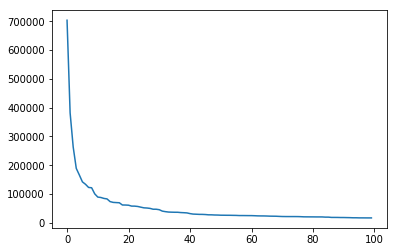

In [69]:
plt.plot(x, frequencies)

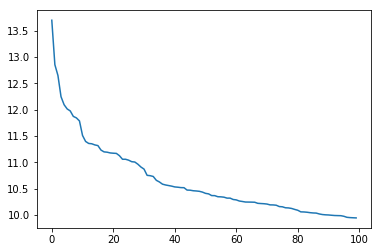

In [66]:
import numpy as np
plt.plot(x, np.log(frequencies))

In [70]:
def prob_1(word):
    if word in TOKEN:
        return words_count[word] / len(TOKEN)
    else:
        return 1/len(TOKEN)

In [71]:
prob_1("我们")

0.0011341646643398752

In [72]:
TOKEN = [str(t) for t in TOKEN]

In [73]:
TOKEN

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一

In [74]:
TOKEN_2_GRAM = ["".join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-1]))]

In [75]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [3]:
words_count_2 = Counter(TOKEN_2_GRAM)

NameError: name 'Counter' is not defined

In [1]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2:
        return (words_count_2[word1+word2] / len(TOKEN_2_GRAM)) / prob_1(word1)
    else:
        return (1 / len(words_count_2)) / prob_1(word1)

In [2]:
prob_2("我们", "在")

NameError: name 'words_count_2' is not defined

In [79]:
def get_probability(sentence):

    sentence_pro = prob_1(sentence[0])
    
    for i, word in enumerate(sentence[:-1]):
        next_ = sentence[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    
    return sentence_pro

In [113]:
get_probability("小明今天抽奖抽到一台苹果")

1.9023495743867354e-26

In [111]:
get_probability("煎饼果子来一套")

1.270885177456333e-12

In [77]:
for sen in [generate(gram=example_grammar, target="sentence") for i in range(10)]:
    print("sentence: {} whith Prb: {}".format(sen, get_probability(sen)))

sentence: 这个 null 女人 看着 一个 小小的 小小的 null 女人 whith Prb: 1.5085857216902014e-54
sentence: 这个 null 小猫 看着 一个 null 小猫 whith Prb: 1.2670912133858376e-36
sentence: 一个 小小的 好看的 null 女人 坐在 这个 null 小猫 whith Prb: 1.7350104099036807e-56
sentence: 一个 蓝色的 蓝色的 好看的 蓝色的 蓝色的 null 篮球 听着 一个 小小的 null 小猫 whith Prb: 1.6573626894115193e-76
sentence: 这个 好看的 null 桌子 听着 一个 蓝色的 null 桌子 whith Prb: 2.3172009218230292e-45
sentence: 一个 null 小猫 看着 一个 好看的 null 女人 whith Prb: 3.251915376084045e-45
sentence: 一个 null 桌子 看见 一个 小小的 null 女人 whith Prb: 6.75541441681603e-41
sentence: 这个 null 小猫 看见 一个 小小的 小小的 null 女人 whith Prb: 8.999310744820959e-52
sentence: 一个 null 篮球 坐在 一个 蓝色的 好看的 null 小猫 whith Prb: 4.8007480963903175e-51
sentence: 这个 null 小猫 听着 这个 null 桌子 whith Prb: 4.1056194741884e-32


In [80]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 苹果牛奶来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probability {}'.format(s1, p1))
    print('-'*4 + ' {} with probability {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probability 1.3426790258741923e-45
---- 明天晚上请你吃大餐，我们一起吃苹果 with probability 2.2328752200287815e-40
真事一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probability 1.1235003992201301e-26
---- 真是一只好看的小猫 with probability 1.1044170698415484e-26
今晚火锅去吃我 is more possible
---- 今晚我去吃火锅 with probability 1.8656532372488964e-17
---- 今晚火锅去吃我 with probability 2.316493040477691e-16
洋葱奶昔来一杯 is more possible
---- 洋葱奶昔来一杯 with probability 1.182167836020911e-15
---- 苹果牛奶来一杯 with probability 8.697621552282032e-18
